# Nonlinear Inverse Problems

## Introduction

Inverse problems are fundamental in geophysics, where we seek to determine subsurface properties (model parameters) from observed data. Unlike linear inverse problems, **nonlinear inverse problems** involve a nonlinear relationship between the model parameters **m** and the predicted data **d**:

$$\mathbf{d} = \mathbf{g}(\mathbf{m})$$

where $\mathbf{g}(\mathbf{m})$ is a nonlinear forward modeling function. The goal is to find the model parameters **m** that best fit the observed data $\mathbf{d}_{obs}$ by minimizing an objective function, typically the least-squares misfit:

$$\phi(\mathbf{m}) = ||\mathbf{g}(\mathbf{m}) - \mathbf{d}_{obs}||^2$$

## Iterative Solution Methods

Since nonlinear problems cannot be solved directly, we use iterative methods that start with an initial model $\mathbf{m}_0$ and update it through successive iterations:

$$\mathbf{m}_{k+1} = \mathbf{m}_k + \alpha_k \Delta\mathbf{m}_k$$

where $\alpha_k$ is the step length and $\Delta\mathbf{m}_k$ is the model update direction.

### 1. Newton's Method

Newton's method uses both first and second derivatives of the objective function. The model update is given by:

$$\Delta\mathbf{m}_k = -\mathbf{H}^{-1}_k \mathbf{g}_k$$

where:
- $\mathbf{g}_k = \nabla\phi(\mathbf{m}_k)$ is the gradient vector
- $\mathbf{H}_k = \nabla^2\phi(\mathbf{m}_k)$ is the Hessian matrix

**Advantages:** Quadratic convergence near the solution  
**Disadvantages:** Requires computing and inverting the full Hessian matrix, which is computationally expensive

### 2. Gauss-Newton Method

The Gauss-Newton method approximates the Hessian by neglecting second-order terms, using only the Jacobian matrix $\mathbf{J}$:

$$\Delta\mathbf{m}_k = -(\mathbf{J}_k^T\mathbf{J}_k)^{-1}\mathbf{J}_k^T\mathbf{r}_k$$

where:
- $\mathbf{J}_k$ is the Jacobian matrix with elements $J_{ij} = \frac{\partial g_i(\mathbf{m}_k)}{\partial m_j}$
- $\mathbf{r}_k = \mathbf{g}(\mathbf{m}_k) - \mathbf{d}_{obs}$ is the residual vector

**Advantages:** Computationally more efficient than Newton's method  
**Disadvantages:** May not converge if $\mathbf{J}_k^T\mathbf{J}_k$ is singular or poorly conditioned

### 3. Levenberg-Marquardt Method

The Levenberg-Marquardt method combines the advantages of both Newton and Gauss-Newton methods by adding a damping parameter $\lambda$:

$$\Delta\mathbf{m}_k = -(\mathbf{J}_k^T\mathbf{J}_k + \lambda_k\mathbf{I})^{-1}\mathbf{J}_k^T\mathbf{r}_k$$

The damping parameter $\lambda_k$ is adaptively adjusted:
- **Large $\lambda$:** Behaves like steepest descent (stable but slow)
- **Small $\lambda$:** Behaves like Gauss-Newton (fast but potentially unstable)

**Advantages:** 
- Robust convergence properties
- Automatically switches between steepest descent and Gauss-Newton behavior
- Handles poorly conditioned problems well

**Disadvantages:** Requires tuning of the damping parameter



Calculating linear objective function...
Calculating nonlinear objective function...
Calculating nonlinear objective function...


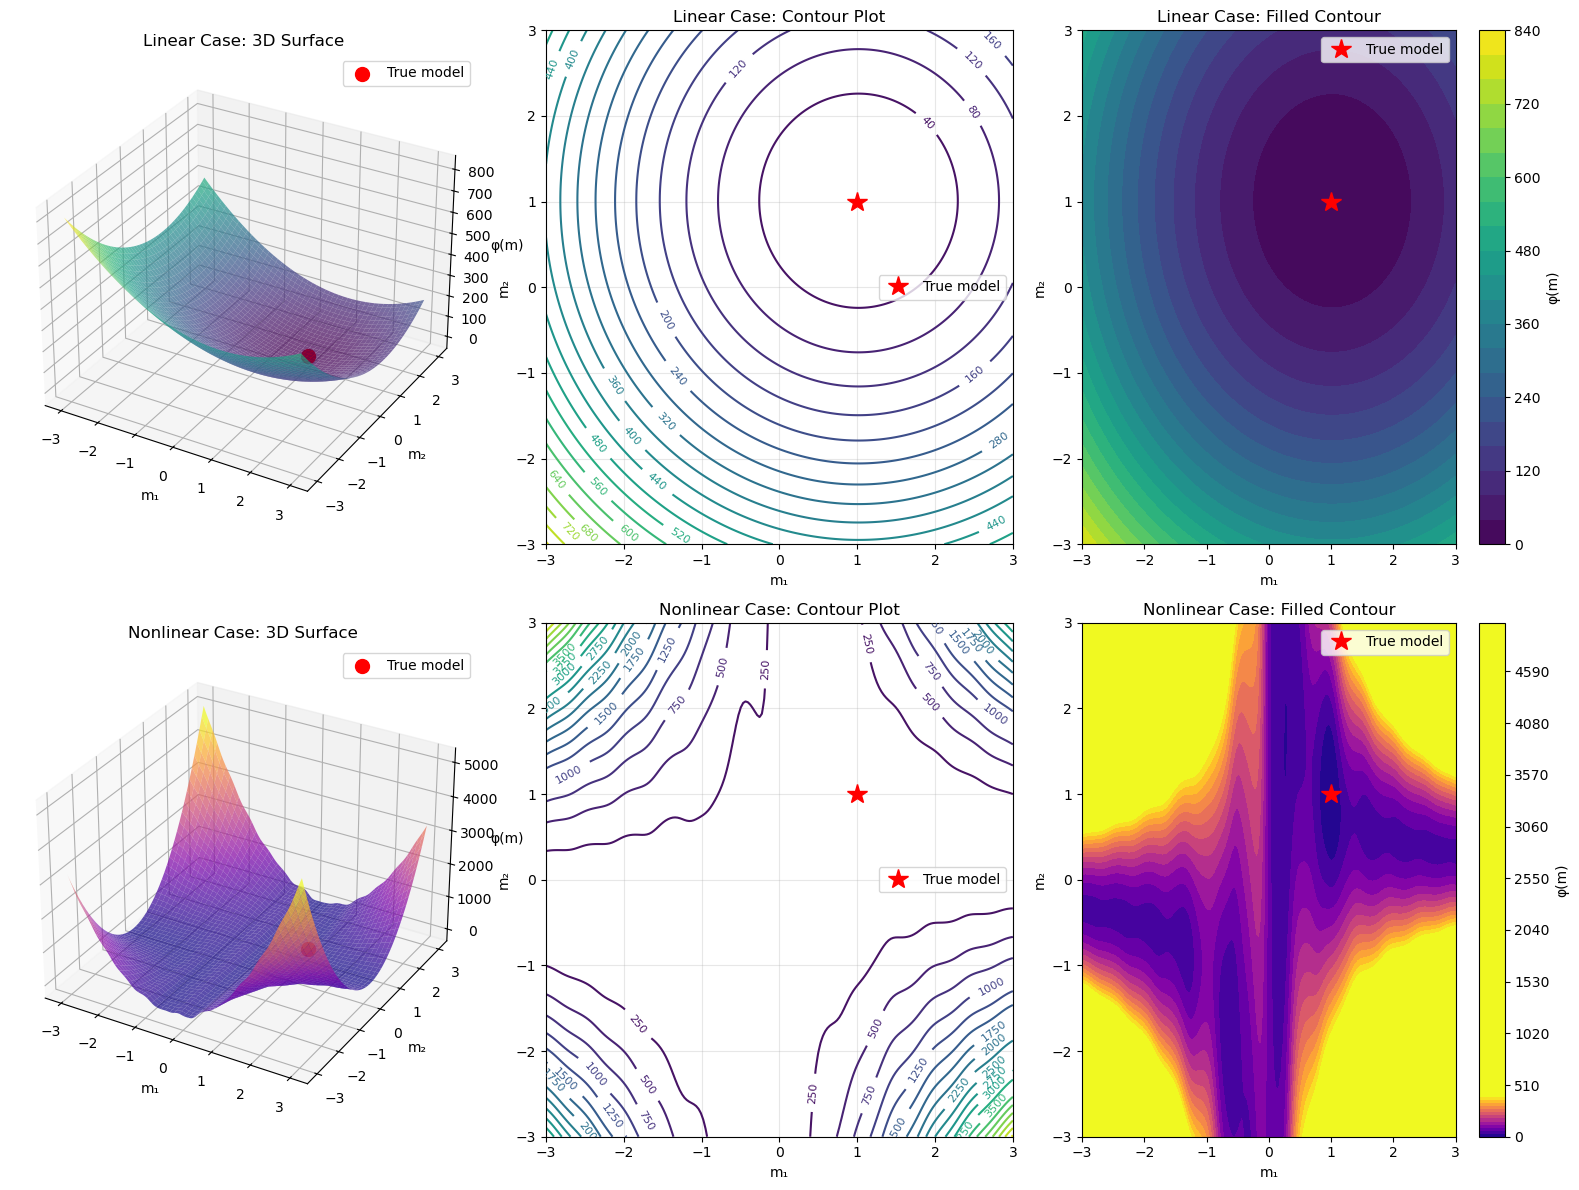


ANALYSIS OF OBJECTIVE FUNCTIONS
True model (linear case): m₁ = 1, m₂ = 1
True model (nonlinear case): m₁ = 1, m₂ = 1

Minimum φ(m) - Linear case: 0.104878
Minimum φ(m) - Nonlinear case: 0.308609


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the parameter space
m1_range = np.linspace(-3, 3, 200)
m2_range = np.linspace(-3, 3, 200)
M1, M2 = np.meshgrid(m1_range, m2_range)

# True model parameters
m_true = np.array([1, 1])

# Generate synthetic observed data for both cases
np.random.seed(42)  # For reproducibility
n_data = 50
x_obs = np.linspace(0, 2*np.pi, n_data)

def linear_forward_model(m, x):
    """Linear forward model: d = m1 * sin(x) + m2 * cos(x)"""
    return m[0] * np.sin(2*x) + m[1] * np.cos(2*x)

def nonlinear_forward_model(m, x):
    """Nonlinear forward model: d =   sin(m1 * x) + m1 * m2 """
    return  np.sin(2 * m[0] * x) + m[0] * m[1]

# Generate observed data with noise
d_obs_linear_clean = linear_forward_model(m_true, x_obs)
d_obs_nonlinear_clean = nonlinear_forward_model(m_true, x_obs)

# Add realistic noise (5% of signal RMS for both cases)
noise_level_linear = 0.05 * np.sqrt(np.mean(d_obs_linear_clean**2))
noise_level_nonlinear = 0.05 * np.sqrt(np.mean(d_obs_nonlinear_clean**2))

noise_linear = np.random.normal(0, noise_level_linear, n_data)
noise_nonlinear = np.random.normal(0, noise_level_nonlinear, n_data)

d_obs_linear = d_obs_linear_clean + noise_linear
d_obs_nonlinear = d_obs_nonlinear_clean + noise_nonlinear


def objective_function_linear(m1, m2):
    """Linear objective function φ(m) = ||G*m - d_obs||²"""
    # Handle both scalar and array inputs
    if np.isscalar(m1) and np.isscalar(m2):
        m = np.array([m1, m2])
        d_pred = linear_forward_model(m, x_obs)
        residual = d_pred - d_obs_linear
        return np.sum(residual**2)
    else:
        phi = np.zeros_like(m1)
        for i in range(m1.shape[0]):
            for j in range(m1.shape[1]):
                m = np.array([m1[i,j], m2[i,j]])
                d_pred = linear_forward_model(m, x_obs)
                residual = d_pred - d_obs_linear
                phi[i,j] = np.sum(residual**2)
        return phi

def objective_function_nonlinear(m1, m2):
    """Nonlinear objective function φ(m) = ||g(m) - d_obs||²"""
    # Handle both scalar and array inputs
    if np.isscalar(m1) and np.isscalar(m2):
        m = np.array([m1, m2])
        d_pred = nonlinear_forward_model(m, x_obs)
        residual = d_pred - d_obs_nonlinear
        return np.sum(residual**2)
    else:
        phi = np.zeros_like(m1)
        for i in range(m1.shape[0]):
            for j in range(m1.shape[1]):
                m = np.array([m1[i,j], m2[i,j]])
                d_pred = nonlinear_forward_model(m, x_obs)
                residual = d_pred - d_obs_nonlinear
                phi[i,j] = np.sum(residual**2)
        return phi

# Calculate objective functions
print("Calculating linear objective function...")
phi_linear = objective_function_linear(M1, M2)

print("Calculating nonlinear objective function...")
phi_nonlinear = objective_function_nonlinear(M1, M2)

# Create the plots
fig = plt.figure(figsize=(16, 12))

# Linear case - 3D surface
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
surf1 = ax1.plot_surface(M1, M2, phi_linear, cmap='viridis', alpha=0.7)
ax1.scatter(m_true[0], m_true[1], objective_function_linear(m_true[0], m_true[1]), 
           color='red', s=100, label='True model')
ax1.set_xlabel('m₁')
ax1.set_ylabel('m₂')
ax1.set_zlabel('φ(m)')
ax1.set_title('Linear Case: 3D Surface')
ax1.legend()

# Linear case - contour plot
ax2 = fig.add_subplot(2, 3, 2)
contour1 = ax2.contour(M1, M2, phi_linear, levels=20)
ax2.clabel(contour1, inline=True, fontsize=8)
ax2.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax2.set_xlabel('m₁')
ax2.set_ylabel('m₂')
ax2.set_title('Linear Case: Contour Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Linear case - filled contour
ax3 = fig.add_subplot(2, 3, 3)
contourf1 = ax3.contourf(M1, M2, phi_linear, levels=20, cmap='viridis')
plt.colorbar(contourf1, ax=ax3, label='φ(m)')
ax3.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax3.set_xlabel('m₁')
ax3.set_ylabel('m₂')
ax3.set_title('Linear Case: Filled Contour')
ax3.legend()

# Nonlinear case - 3D surface
ax4 = fig.add_subplot(2, 3, 4, projection='3d')
surf2 = ax4.plot_surface(M1, M2, phi_nonlinear, cmap='plasma', alpha=0.7)
ax4.scatter(m_true[0], m_true[1], 
           objective_function_nonlinear(m_true[0], m_true[1]), 
           color='red', s=100, label='True model')
ax4.set_xlabel('m₁')
ax4.set_ylabel('m₂')
ax4.set_zlabel('φ(m)')
ax4.set_title('Nonlinear Case: 3D Surface')
ax4.legend()

# Nonlinear case - contour plot
ax5 = fig.add_subplot(2, 3, 5)
contour2 = ax5.contour(M1, M2, phi_nonlinear, levels=20)
ax5.clabel(contour2, inline=True, fontsize=8)
ax5.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax5.set_xlabel('m₁')
ax5.set_ylabel('m₂')
ax5.set_title('Nonlinear Case: Contour Plot')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Nonlinear case - filled contour
ax6 = fig.add_subplot(2, 3, 6)
contourf2 = ax6.contourf(M1, M2, phi_nonlinear, levels=200, cmap='plasma', vmin=0, vmax=400)
plt.colorbar(contourf2, ax=ax6, label='φ(m)')
ax6.plot(m_true[0], m_true[1], 'r*', markersize=15, label='True model')
ax6.set_xlabel('m₁')
ax6.set_ylabel('m₂')
ax6.set_title('Nonlinear Case: Filled Contour')
ax6.legend()

plt.tight_layout()
plt.show()

# Print some analysis
print("\n" + "="*60)
print("ANALYSIS OF OBJECTIVE FUNCTIONS")
print("="*60)
print(f"True model (linear case): m₁ = {m_true[0]}, m₂ = {m_true[1]}")
print(f"True model (nonlinear case): m₁ = {m_true[0]}, m₂ = {m_true[1]}")

# Find minimum values
min_linear = np.min(phi_linear)
min_nonlinear = np.min(phi_nonlinear)
print(f"\nMinimum φ(m) - Linear case: {min_linear:.6f}")
print(f"Minimum φ(m) - Nonlinear case: {min_nonlinear:.6f}")




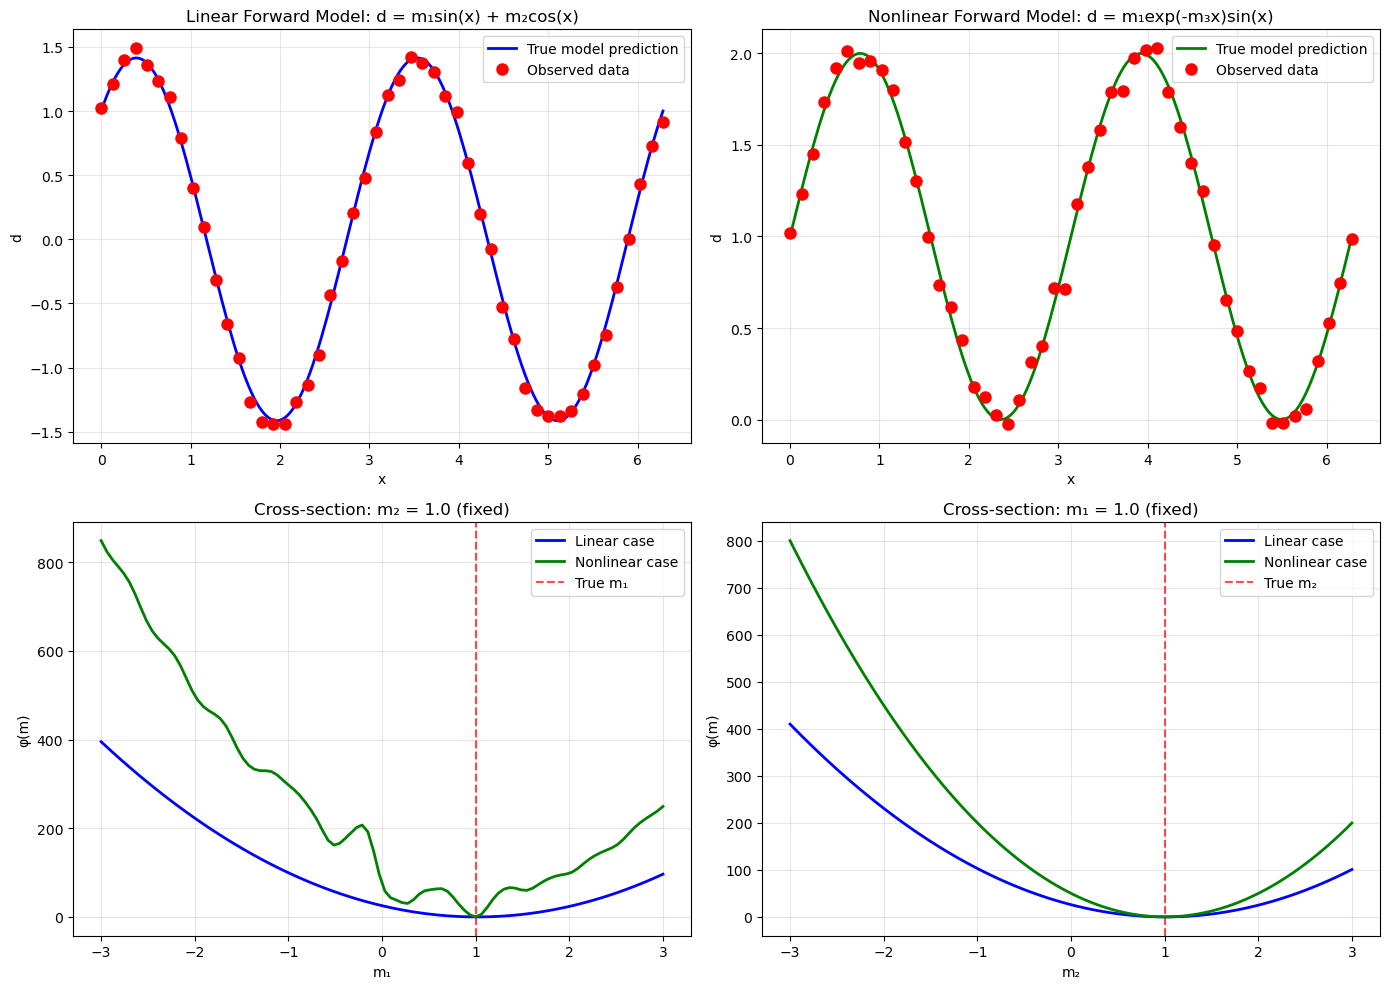


KEY DIFFERENCES BETWEEN LINEAR AND NONLINEAR CASES

1. OBJECTIVE FUNCTION SHAPE:
   • Linear: Perfect elliptical contours (quadratic)
   • Nonlinear: Irregular, potentially multi-modal

2. OPTIMIZATION IMPLICATIONS:
   • Linear: Single global minimum, predictable convergence
   • Nonlinear: May have local minima, convergence depends on starting point

3. GRADIENT BEHAVIOR:
   • Linear: Constant curvature, uniform convergence rate
   • Nonlinear: Variable curvature, convergence rate varies with location

4. PRACTICAL CONSEQUENCES:
   • Linear: Any optimization method will find the global minimum
   • Nonlinear: Requires careful choice of initial model and robust methods


In [18]:
# Visualize the forward models and data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot the forward models
x_fine = np.linspace(0, 2*np.pi, 200)

# Linear forward model
d_linear_fine = linear_forward_model(m_true, x_fine)
ax1.plot(x_fine, d_linear_fine, 'b-', linewidth=2, label='True model prediction')
ax1.plot(x_obs, d_obs_linear, 'ro', markersize=8, label='Observed data')
ax1.set_xlabel('x')
ax1.set_ylabel('d')
ax1.set_title('Linear Forward Model: d = m₁sin(x) + m₂cos(x)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Nonlinear forward model
d_nonlinear_fine = nonlinear_forward_model(m_true, x_fine)
ax2.plot(x_fine, d_nonlinear_fine, 'g-', linewidth=2, label='True model prediction')
ax2.plot(x_obs, d_obs_nonlinear, 'ro', markersize=8, label='Observed data')
ax2.set_xlabel('x')
ax2.set_ylabel('d')
ax2.set_title('Nonlinear Forward Model: d = m₁exp(-m₃x)sin(x)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Show cross-sections of the objective functions
# Cross-section through the true model (varying m1, fixing m2)
m1_cross = np.linspace(-3, 3, 100)
phi_linear_cross = []
phi_nonlinear_cross = []

for m1_val in m1_cross:
    phi_linear_cross.append(objective_function_linear(m1_val, m_true[1]))
    phi_nonlinear_cross.append(objective_function_nonlinear(m1_val, m_true[1]))

ax3.plot(m1_cross, phi_linear_cross, 'b-', linewidth=2, label='Linear case')
ax3.plot(m1_cross, phi_nonlinear_cross, 'g-', linewidth=2, label='Nonlinear case')
ax3.axvline(m_true[0], color='r', linestyle='--', alpha=0.7, label='True m₁')
ax3.set_xlabel('m₁')
ax3.set_ylabel('φ(m)')
ax3.set_title(f'Cross-section: m₂ = {m_true[1]:.1f} (fixed)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Cross-section through the true model (varying m2, fixing m1)
m2_cross = np.linspace(-3, 3, 100)
phi_linear_cross2 = []
phi_nonlinear_cross2 = []

for m2_val in m2_cross:
    phi_linear_cross2.append(objective_function_linear(m_true[0], m2_val))
    phi_nonlinear_cross2.append(objective_function_nonlinear(m_true[0], m2_val))

ax4.plot(m2_cross, phi_linear_cross2, 'b-', linewidth=2, label='Linear case')
ax4.plot(m2_cross, phi_nonlinear_cross2, 'g-', linewidth=2, label='Nonlinear case')
ax4.axvline(m_true[1], color='r', linestyle='--', alpha=0.7, label='True m₂')
ax4.set_xlabel('m₂')
ax4.set_ylabel('φ(m)')
ax4.set_title(f'Cross-section: m₁ = {m_true[0]:.1f} (fixed)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY DIFFERENCES BETWEEN LINEAR AND NONLINEAR CASES")
print("="*60)
print("\n1. OBJECTIVE FUNCTION SHAPE:")
print("   • Linear: Perfect elliptical contours (quadratic)")
print("   • Nonlinear: Irregular, potentially multi-modal")

print("\n2. OPTIMIZATION IMPLICATIONS:")
print("   • Linear: Single global minimum, predictable convergence")
print("   • Nonlinear: May have local minima, convergence depends on starting point")

print("\n3. GRADIENT BEHAVIOR:")
print("   • Linear: Constant curvature, uniform convergence rate")
print("   • Nonlinear: Variable curvature, convergence rate varies with location")

print("\n4. PRACTICAL CONSEQUENCES:")
print("   • Linear: Any optimization method will find the global minimum")
print("   • Nonlinear: Requires careful choice of initial model and robust methods")

# Derivation of Gauss-Newton and Levenberg-Marquardt Methods

Below is section 9.2 from Aster, Borchers, Thurber 2005. 


![Gauss-Newton 1](GaussNewton1.png)


![Gauss-Newton 2](GaussNewton2.png)


![Gauss-Newton 3](GaussNewton3.png)



# Practical Implementation: Gauss-Newton Method

## Overview
The following implementation demonstrates the **Gauss-Newton method** for solving a nonlinear inverse problem.

## Forward Model
We use a simple nonlinear forward model:
$$d_i = \sin(w_0 m_1 x_i) + m_1 m_2$$

where:
- $d_i$ are the predicted data values
- $m_1, m_2$ are the model parameters we want to estimate
- $x_i$ are the observation positions
- $w_0 = 20$ is a frequency parameter

## Gauss-Newton Implementation

### 1. **Jacobian Matrix Computation**
For each iteration, we compute the Jacobian matrix $\mathbf{J}$ with partial derivatives:

$$J_{i1} = \frac{\partial g_i}{\partial m_1} = w_0 x_i \cos(w_0 m_1 x_i) + m_2$$

$$J_{i2} = \frac{\partial g_i}{\partial m_2} = m_1$$

### 2. **Model Update**
The Gauss-Newton update equation is:
$$\Delta\mathbf{m} = (\mathbf{J}^T\mathbf{J})^{-1}\mathbf{J}^T\mathbf{r}$$

where $\mathbf{r} = \mathbf{d}_{obs} - \mathbf{g}(\mathbf{m})$ is the residual vector.

### 3. **Iterative Process**
- Start with initial guess $\mathbf{m}_0$
- Iterate: $\mathbf{m}_{k+1} = \mathbf{m}_k + \Delta\mathbf{m}_k$
- Continue until convergence

## Visualization Features

The implementation produces six comprehensive plots:

1. **2D Objective Function Surface** - Shows the error landscape with iteration path
2. **Convergence History** - Error reduction over iterations (log scale)
3. **Parameter Evolution (m₁)** - How m₁ converges to true value
4. **Parameter Evolution (m₂)** - How m₂ converges to true value  
5. **Data Fit Comparison** - True vs observed vs fitted data
6. **Results Summary** - Statistical overview of convergence

## Key Insights

- **Rapid Convergence**: Gauss-Newton typically converges quickly when starting near the solution
- **Path Visualization**: The white circles show the iteration path on the objective function surface
- **Quadratic Convergence**: Near the minimum, the method exhibits fast convergence
- **Sensitivity**: The method's performance depends on the initial guess and problem conditioning

This example illustrates why Gauss-Newton is preferred over full Newton's method in geophysics: it avoids computing the expensive Hessian matrix while maintaining good convergence properties for well-posed problems.

Computing objective function on 2D grid...
Running Newton's method iterations...


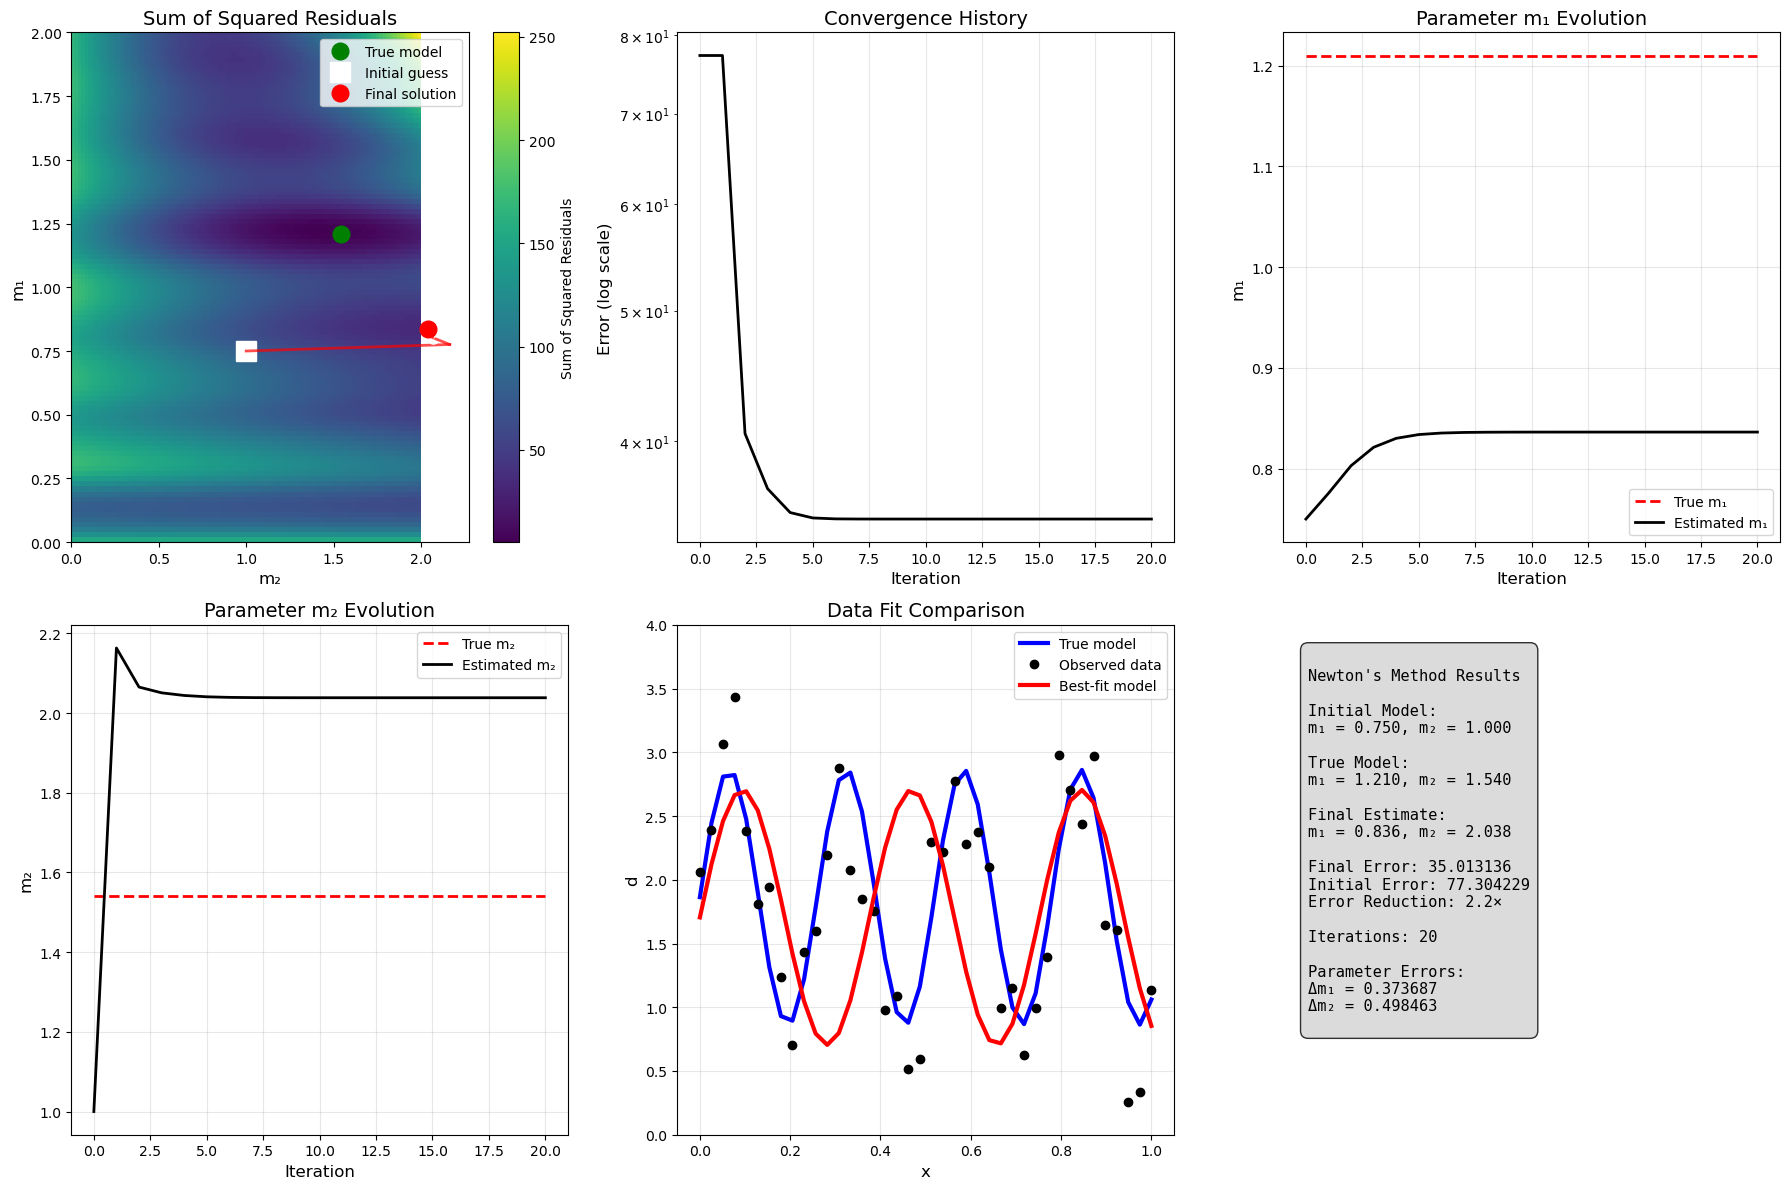

\n============================================================
NEWTON'S METHOD RESULTS
Initial model: m₁ = 0.750000, m₂ = 1.000000
True model:    m₁ = 1.210000, m₂ = 1.540000
Final estimate: m₁ = 0.836313, m₂ = 2.038463
\nError reduction: 77.304229 → 35.013136 (2.2× improvement)
Parameter errors: Δm₁ = 0.373687, Δm₂ = 0.498463


In [3]:
# Gauss-Newton Method Implementation
# Invert for m1, m2 using simple forward model: d = sin(w0*m1*x) + m1*m2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Make synthetic data
N = 40
xmin = 0
xmax = 1.0
Dx = (xmax - xmin) / (N - 1)
x = np.linspace(xmin, xmax, N)

# True model parameters
mtrue = np.array([1.21, 1.54])

w0 = 20
dtrue = np.sin(w0 * mtrue[0] * x) + mtrue[0] * mtrue[1]
sd = 0.4  # data standard deviation
np.random.seed(42)  # for reproducibility
dobs = dtrue + np.random.normal(0, sd, N)

# 2D grid for plotting residuals
L = 101
Dm = 0.02
m1min = 0
m2min = 0
m1a = np.linspace(m1min, m1min + Dm * (L - 1), L)
m2a = np.linspace(m2min, m2min + Dm * (L - 1), L)
m1max = m1a[-1]
m2max = m2a[-1]

# Compute error (sum of squared residuals) on grid for plotting
print("Computing objective function on 2D grid...")
E = np.zeros((L, L))
M1_grid, M2_grid = np.meshgrid(m1a, m2a)

for j in range(L):
    for k in range(L):
        dpre = np.sin(w0 * m1a[j] * x) + m1a[j] * m2a[k]
        E[j, k] = np.sum((dobs - dpre)**2)

# Create figure with subplots
fig = plt.figure(figsize=(18, 12))

# Plot 2D objective function
ax1 = plt.subplot(2, 3, 1)
im = ax1.imshow(E, extent=[m2min, m2max, m1min, m1max], 
                origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(im, ax=ax1, label='Sum of Squared Residuals')
ax1.plot(mtrue[1], mtrue[0], 'go', markersize=12, linewidth=3, label='True model')
ax1.set_xlabel('m₂', fontsize=12)
ax1.set_ylabel('m₁', fontsize=12)
ax1.set_title('Sum of Squared Residuals', fontsize=14)

# Newton's method implementation
# Forward model: y = sin(w0 * m1 * x) + m1 * m2
# Derivatives: dy/dm1 = w0 * x * cos(w0 * m1 * x) + m2
#             dy/dm2 = m1

# Initial guess
#m0 = np.array([1.15, 1.0])
m0 = np.array([0.75, 1.0])
dhat = np.sin(w0 * m0[0] * x) + m0[0] * m0[1]
Eg = np.sum((dobs - dhat)**2)
ax1.plot(m0[1], m0[0], 'ws', markersize=15, linewidth=2, label='Initial guess')

# Storage for iteration history
Niter = 20
Ehis = np.zeros(Niter + 1)
m1his = np.zeros(Niter + 1)
m2his = np.zeros(Niter + 1)

# Store initial guess
Ehis[0] = Eg
m1his[0] = m0[0]
m2his[0] = m0[1]

# Newton's method iterations
print("Running Newton's method iterations...")
mg = m0.copy()

for k in range(Niter):
    # Forward model prediction
    dhat = np.sin(w0 * mg[0] * x) + mg[0] * mg[1]
    dd = dobs - dhat  # residuals
    Eg = np.sum(dd**2)
    Ehis[k + 1] = Eg
    
    # Jacobian matrix (derivative matrix)
    G = np.zeros((N, 2))
    G[:, 0] = w0 * x * np.cos(w0 * mg[0] * x) + mg[1]  # dg/dm1
    G[:, 1] = np.ones(N) * mg[0]  # dg/dm2
    
    # Gauss-Newton update: dm = (G^T G)^-1 G^T dd
    try:
        dm = np.linalg.solve(G.T @ G, G.T @ dd)
    except np.linalg.LinAlgError:
        print(f"Singular matrix at iteration {k}, stopping")
        break
    
    # Update model
    mg = mg + dm
    
    # Plot update on objective function surface
    ax1.plot(mg[1], mg[0], 'wo', markersize=8, linewidth=2)
    
    # Store history
    m1his[k + 1] = mg[0]
    m2his[k + 1] = mg[1]
    
    # Show step as line on plot
    if k < Niter - 1:  # Don't plot line for last iteration
        ax1.plot([m2his[k], m2his[k + 1]], [m1his[k], m1his[k + 1]], 
                'r-', linewidth=2, alpha=0.7)

# Final estimates
m1hat = m1his[Niter]
m2hat = m2his[Niter]

# Mark final solution
ax1.plot(mg[1], mg[0], 'ro', markersize=12, linewidth=3, label='Final solution')
ax1.legend(fontsize=10)

# Plot convergence history
ax2 = plt.subplot(2, 3, 2)
ax2.semilogy(range(Niter + 1), Ehis, 'k-', linewidth=2)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Error (log scale)', fontsize=12)
ax2.set_title('Convergence History', fontsize=14)
ax2.grid(True, alpha=0.3)

# Plot parameter evolution - m1
ax3 = plt.subplot(2, 3, 3)
ax3.plot([0, Niter], [mtrue[0], mtrue[0]], 'r--', linewidth=2, label='True m₁')
ax3.plot(range(Niter + 1), m1his, 'k-', linewidth=2, label='Estimated m₁')
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('m₁', fontsize=12)
ax3.set_title('Parameter m₁ Evolution', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot parameter evolution - m2
ax4 = plt.subplot(2, 3, 4)
ax4.plot([0, Niter], [mtrue[1], mtrue[1]], 'r--', linewidth=2, label='True m₂')
ax4.plot(range(Niter + 1), m2his, 'k-', linewidth=2, label='Estimated m₂')
ax4.set_xlabel('Iteration', fontsize=12)
ax4.set_ylabel('m₂', fontsize=12)
ax4.set_title('Parameter m₂ Evolution', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot data and fits
ax5 = plt.subplot(2, 3, 5)
ax5.plot(x, dtrue, 'b-', linewidth=3, label='True model')
ax5.plot(x, dobs, 'ko', markersize=6, linewidth=2, label='Observed data')
dpre = np.sin(w0 * m1hat * x) + m1hat * m2hat
ax5.plot(x, dpre, 'r-', linewidth=3, label='Best-fit model')
ax5.set_xlabel('x', fontsize=12)
ax5.set_ylabel('d', fontsize=12)
ax5.set_title('Data Fit Comparison', fontsize=14)
ax5.legend()
ax5.grid(True, alpha=0.3)
ax5.set_ylim(0, 4)

# Summary statistics
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
results_text = f"""
Newton's Method Results

Initial Model:
m₁ = {m0[0]:.3f}, m₂ = {m0[1]:.3f}

True Model:
m₁ = {mtrue[0]:.3f}, m₂ = {mtrue[1]:.3f}

Final Estimate:
m₁ = {m1hat:.3f}, m₂ = {m2hat:.3f}

Final Error: {Ehis[-1]:.6f}
Initial Error: {Ehis[0]:.6f}
Error Reduction: {Ehis[0]/Ehis[-1]:.1f}×

Iterations: {Niter}

Parameter Errors:
Δm₁ = {abs(m1hat - mtrue[0]):.6f}
Δm₂ = {abs(m2hat - mtrue[1]):.6f}
"""
ax6.text(0.05, 0.95, results_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()

print("\\n" + "="*60)
print("NEWTON'S METHOD RESULTS")
print("="*60)
print(f"Initial model: m₁ = {m0[0]:.6f}, m₂ = {m0[1]:.6f}")
print(f"True model:    m₁ = {mtrue[0]:.6f}, m₂ = {mtrue[1]:.6f}")
print(f"Final estimate: m₁ = {m1hat:.6f}, m₂ = {m2hat:.6f}")
print(f"\\nError reduction: {Ehis[0]:.6f} → {Ehis[-1]:.6f} ({Ehis[0]/Ehis[-1]:.1f}× improvement)")
print(f"Parameter errors: Δm₁ = {abs(m1hat - mtrue[0]):.6f}, Δm₂ = {abs(m2hat - mtrue[1]):.6f}")

# Nelder-Mead Simplex Method

## Overview
The **Nelder-Mead simplex method** is a derivative-free optimization algorithm that is particularly useful for nonlinear inverse problems where:
- Gradients are difficult or expensive to compute
- The objective function may be noisy or discontinuous
- A robust, easy-to-implement method is needed

Unlike gradient-based methods (Newton, Gauss-Newton, Levenberg-Marquardt), the Nelder-Mead method uses only function evaluations and geometric transformations.

## Algorithm Concept

### Simplex Definition
A **simplex** is a geometric figure consisting of n+1 vertices in n-dimensional space:
- In 2D: a triangle (3 vertices)
- In 3D: a tetrahedron (4 vertices)
- In nD: n+1 vertices defining a polytope

For our 2-parameter inverse problem, the simplex is a triangle in the (m₁, m₂) parameter space.

## Basic Algorithm Steps

### 1. **Initialization**
- Create initial simplex with n+1 vertices around starting point
- Evaluate objective function at each vertex
- Order vertices: $f(x_1) \leq f(x_2) \leq ... \leq f(x_{n+1})$

### 2. **Geometric Operations**
The method uses four geometric transformations:

#### **Reflection** (α = 1)
$$x_r = \bar{x} + \alpha(\\bar{x} - x_{n+1})$$
where $\\bar{x}$ is the centroid of the best n points.

#### **Expansion** (γ = 2) 
If reflection improves the best point:
$$x_e = \\bar{x} + \gamma(x_r - \\bar{x})$$

#### **Contraction** (β = 0.5)
If reflection fails to improve:
- **Outside contraction**: $x_{oc} = \\bar{x} + \beta(x_r - \\bar{x})$
- **Inside contraction**: $x_{ic} = \\bar{x} - \beta(x_r - \\bar{x})$

#### **Shrink** (δ = 0.5)
If contraction fails, shrink all points toward the best:
$$x_i = x_1 + \delta(x_i - x_1)$$

### 3. **Iteration**
Repeat geometric operations until convergence criteria are met:
- Function tolerance: $|f(x_{max}) - f(x_{min})| < \epsilon_f$
- Parameter tolerance: $||x_{max} - x_{min}|| < \epsilon_x$
- Maximum iterations reached

## Advantages

✅ **No derivatives required** - Only function evaluations needed  
✅ **Robust** - Handles noisy, discontinuous, or poorly conditioned functions  
✅ **Simple implementation** - Easy to code and understand  
✅ **Good for small problems** - Effective for problems with few parameters  
✅ **Handles constraints** - Can be modified for bounded optimization  

## Disadvantages

❌ **Slow convergence** - Typically slower than gradient-based methods  
❌ **Scales poorly** - Performance degrades with increasing dimensions  
❌ **No convergence guarantee** - May stagnate or converge to local minima  
❌ **Many function evaluations** - Can be expensive for costly forward models  
❌ **Parameter sensitivity** - Performance depends on initial simplex size and shape  



## Comparison with Other Methods

| Method | Convergence Rate | Derivative Needed | Robustness | Best Use Case |
|--------|------------------|-------------------|------------|---------------|
| **Nelder-Mead** | Linear | ❌ No | High | Small, noisy problems |
| **Gauss-Newton** | Quadratic | ✅ Yes | Medium | Well-conditioned problems |
| **Levenberg-Marquardt** | Quadratic | ✅ Yes | High | General nonlinear problems |
| **Newton** | Quadratic | ✅ Yes (2nd order) | Low | Smooth, well-conditioned |

## Implementation Notes

The method's success depends on:
- **Initial simplex size**: Too small → premature convergence; Too large → slow convergence
- **Reflection parameters**: Standard values (α=1, γ=2, β=0.5, δ=0.5) work well for most problems
- **Stopping criteria**: Balance between accuracy and computational cost
- **Restart strategy**: Multiple runs with different initial conditions for global optimization

The Nelder-Mead method serves as an excellent complement to gradient-based methods, especially for initial exploration or when derivative information is unreliable.

Running Nelder-Mead Simplex optimization...
Initial guess: m₁ = 1.150, m₂ = 1.000
Converged after 58 iterations
Custom Nelder-Mead result: m₁ = 1.220517, m₂ = 1.458632
SciPy Nelder-Mead result: m₁ = 1.220517, m₂ = 1.458633
True values: m₁ = 1.210000, m₂ = 1.540000


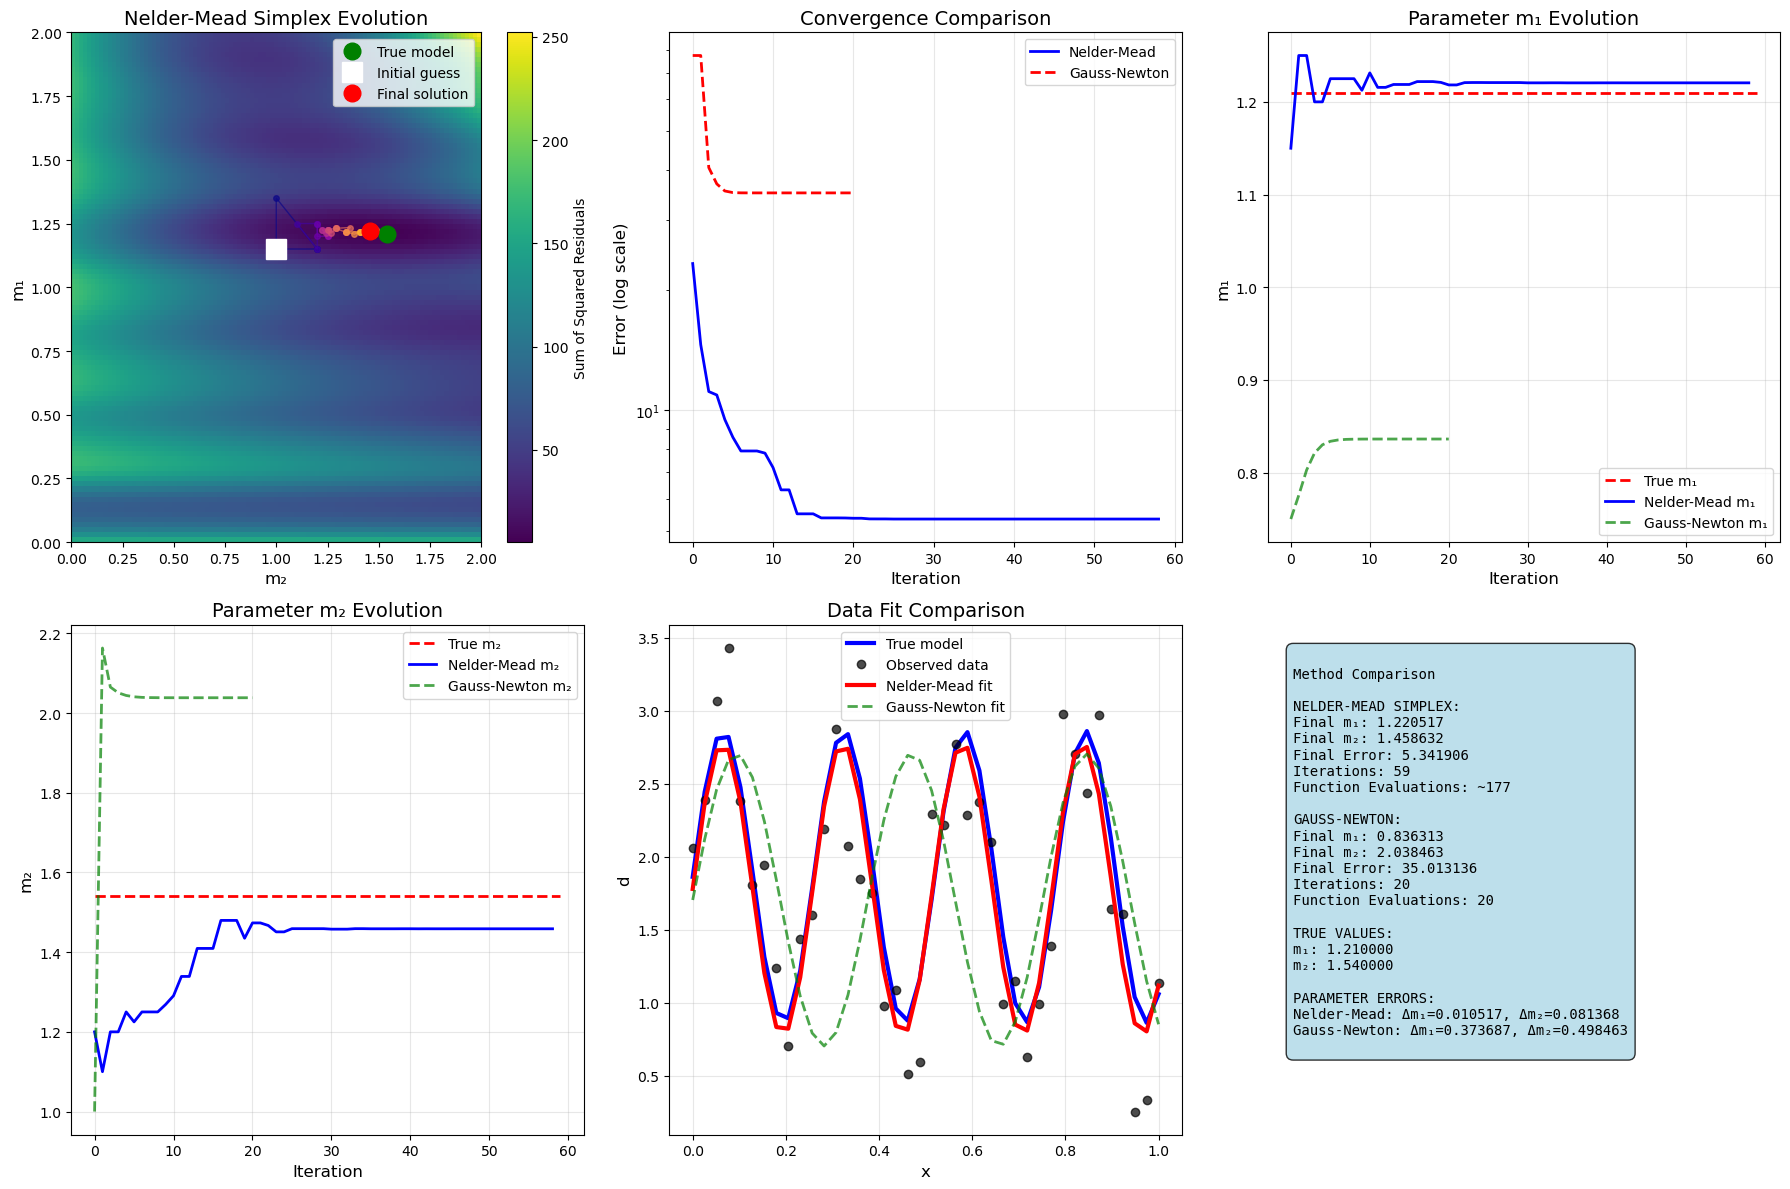


DETAILED METHOD COMPARISON
Metric                    Nelder-Mead     Gauss-Newton   
----------------------------------------------------------------------
Final m₁                  1.220517        0.836313       
Final m₂                  1.458632        2.038463       
Final Error               5.341906        35.013136      
Iterations                59              20             
Function Evaluations      177             20             
Parameter Error Δm₁       0.010517        0.373687       
Parameter Error Δm₂       0.081368        0.498463       

Convergence characteristics:
Nelder-Mead: Derivative-free, robust, slower convergence
Gauss-Newton: Requires derivatives, fast convergence, sensitive to initial guess

Simplex evolution (first 5 iterations):
Iteration 0: Vertices at (1.150, 1.200) (1.150, 1.000) (1.350, 1.000)
Iteration 1: Vertices at (1.250, 1.100) (1.150, 1.200) (1.150, 1.100)
Iteration 2: Vertices at (1.250, 1.200) (1.250, 1.100) (1.150, 1.200)
Iteration 3: Verti

In [4]:
# Nelder-Mead Simplex Method Implementation
# Applied to the same problem: d = sin(w0*m1*x) + m1*m2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Use the same data and setup from the Newton's method example
# (Variables already defined from previous cell: x, dobs, mtrue, w0, etc.)

def objective_function_nm(m):
    """Objective function for Nelder-Mead: returns sum of squared residuals"""
    m1, m2 = m[0], m[1]
    d_pred = np.sin(w0 * m1 * x) + m1 * m2
    residual = dobs - d_pred
    return np.sum(residual**2)

def nelder_mead_custom(initial_simplex, func, max_iter=100, tol=1e-8):
    """
    Custom implementation of Nelder-Mead algorithm for educational purposes
    """
    # Nelder-Mead parameters
    alpha = 1.0    # reflection
    gamma = 2.0    # expansion
    rho = 0.5      # contraction
    sigma = 0.5    # shrink
    
    # Initialize simplex (3 points for 2D problem)
    simplex = np.array(initial_simplex)
    n_params = simplex.shape[1]
    
    # Storage for iteration history
    history = []
    simplex_history = []
    
    for iteration in range(max_iter):
        # Evaluate function at all vertices
        f_values = np.array([func(vertex) for vertex in simplex])
        
        # Sort vertices by function value (best to worst)
        sorted_indices = np.argsort(f_values)
        simplex = simplex[sorted_indices]
        f_values = f_values[sorted_indices]
        
        # Store history
        history.append(f_values[0])  # best function value
        simplex_history.append(simplex.copy())
        
        # Check convergence
        if np.std(f_values) < tol:
            print(f"Converged after {iteration} iterations")
            break
            
        # Compute centroid of all points except the worst
        centroid = np.mean(simplex[:-1], axis=0)
        
        # Reflection
        x_reflected = centroid + alpha * (centroid - simplex[-1])
        f_reflected = func(x_reflected)
        
        if f_values[0] <= f_reflected < f_values[-2]:
            # Accept reflection
            simplex[-1] = x_reflected
        elif f_reflected < f_values[0]:
            # Expansion
            x_expanded = centroid + gamma * (x_reflected - centroid)
            f_expanded = func(x_expanded)
            
            if f_expanded < f_reflected:
                simplex[-1] = x_expanded
            else:
                simplex[-1] = x_reflected
        else:
            # Contraction
            if f_reflected < f_values[-1]:
                # Outside contraction
                x_contracted = centroid + rho * (x_reflected - centroid)
            else:
                # Inside contraction
                x_contracted = centroid - rho * (simplex[-1] - centroid)
                
            f_contracted = func(x_contracted)
            
            if f_contracted < min(f_reflected, f_values[-1]):
                simplex[-1] = x_contracted
            else:
                # Shrink
                for i in range(1, len(simplex)):
                    simplex[i] = simplex[0] + sigma * (simplex[i] - simplex[0])
    
    return simplex[0], history, simplex_history

# Set up initial simplex (triangle around initial guess)
m0_nm = np.array([1.15, 1.0])  # Same initial guess as Newton's method
simplex_size = 0.2

initial_simplex = [
    m0_nm,
    m0_nm + [simplex_size, 0],
    m0_nm + [0, simplex_size]
]

print("Running Nelder-Mead Simplex optimization...")
print(f"Initial guess: m₁ = {m0_nm[0]:.3f}, m₂ = {m0_nm[1]:.3f}")

# Run custom Nelder-Mead
result_nm, error_history_nm, simplex_hist = nelder_mead_custom(
    initial_simplex, objective_function_nm, max_iter=200, tol=1e-10)

# Also run scipy's implementation for comparison
scipy_result = minimize(objective_function_nm, m0_nm, method='Nelder-Mead',
                       options={'maxiter': 200, 'xatol': 1e-10, 'fatol': 1e-10})

print(f"Custom Nelder-Mead result: m₁ = {result_nm[0]:.6f}, m₂ = {result_nm[1]:.6f}")
print(f"SciPy Nelder-Mead result: m₁ = {scipy_result.x[0]:.6f}, m₂ = {scipy_result.x[1]:.6f}")
print(f"True values: m₁ = {mtrue[0]:.6f}, m₂ = {mtrue[1]:.6f}")

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))

# Plot 1: Objective function surface with simplex evolution
ax1 = plt.subplot(2, 3, 1)
im = ax1.imshow(E, extent=[m2min, m2max, m1min, m1max], 
                origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(im, ax=ax1, label='Sum of Squared Residuals')

# Plot simplex evolution
n_show = min(20, len(simplex_hist))  # Show first 20 iterations
colors = plt.cm.plasma(np.linspace(0, 1, n_show))

for i in range(0, n_show, max(1, n_show//10)):  # Show every few iterations
    simplex = simplex_hist[i]
    # Plot triangle
    triangle = np.vstack([simplex, simplex[0]])  # Close the triangle
    ax1.plot(triangle[:, 1], triangle[:, 0], 'o-', color=colors[i], 
            markersize=4, linewidth=1, alpha=0.7)

# Mark important points
ax1.plot(mtrue[1], mtrue[0], 'go', markersize=12, linewidth=3, label='True model')
ax1.plot(m0_nm[1], m0_nm[0], 'ws', markersize=15, linewidth=2, label='Initial guess')
ax1.plot(result_nm[1], result_nm[0], 'ro', markersize=12, linewidth=3, label='Final solution')

ax1.set_xlabel('m₂', fontsize=12)
ax1.set_ylabel('m₁', fontsize=12)
ax1.set_title('Nelder-Mead Simplex Evolution', fontsize=14)
ax1.legend()

# Plot 2: Convergence history comparison
ax2 = plt.subplot(2, 3, 2)
ax2.semilogy(range(len(error_history_nm)), error_history_nm, 'b-', linewidth=2, 
            label='Nelder-Mead')
ax2.semilogy(range(len(Ehis)), Ehis, 'r--', linewidth=2, label='Gauss-Newton')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Error (log scale)', fontsize=12)
ax2.set_title('Convergence Comparison', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Parameter evolution - m1
ax3 = plt.subplot(2, 3, 3)
m1_history_nm = [simplex[0][0] for simplex in simplex_hist]
ax3.plot([0, len(m1_history_nm)], [mtrue[0], mtrue[0]], 'r--', linewidth=2, label='True m₁')
ax3.plot(range(len(m1_history_nm)), m1_history_nm, 'b-', linewidth=2, label='Nelder-Mead m₁')
ax3.plot(range(len(m1his)), m1his, 'g--', linewidth=2, alpha=0.7, label='Gauss-Newton m₁')
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('m₁', fontsize=12)
ax3.set_title('Parameter m₁ Evolution', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Parameter evolution - m2  
ax4 = plt.subplot(2, 3, 4)
m2_history_nm = [simplex[0][1] for simplex in simplex_hist]
ax4.plot([0, len(m2_history_nm)], [mtrue[1], mtrue[1]], 'r--', linewidth=2, label='True m₂')
ax4.plot(range(len(m2_history_nm)), m2_history_nm, 'b-', linewidth=2, label='Nelder-Mead m₂')
ax4.plot(range(len(m2his)), m2his, 'g--', linewidth=2, alpha=0.7, label='Gauss-Newton m₂')
ax4.set_xlabel('Iteration', fontsize=12)
ax4.set_ylabel('m₂', fontsize=12)
ax4.set_title('Parameter m₂ Evolution', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Data fit comparison
ax5 = plt.subplot(2, 3, 5)
d_pred_nm = np.sin(w0 * result_nm[0] * x) + result_nm[0] * result_nm[1]
ax5.plot(x, dtrue, 'b-', linewidth=3, label='True model')
ax5.plot(x, dobs, 'ko', markersize=6, alpha=0.7, label='Observed data')
ax5.plot(x, d_pred_nm, 'r-', linewidth=3, label='Nelder-Mead fit')
ax5.plot(x, dpre, 'g--', linewidth=2, alpha=0.7, label='Gauss-Newton fit')
ax5.set_xlabel('x', fontsize=12)
ax5.set_ylabel('d', fontsize=12)
ax5.set_title('Data Fit Comparison', fontsize=14)
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Method comparison summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

# Calculate final errors
final_error_nm = error_history_nm[-1]
final_error_gn = Ehis[-1]
nm_iterations = len(error_history_nm)
gn_iterations = len(Ehis) - 1

comparison_text = f"""
Method Comparison

NELDER-MEAD SIMPLEX:
Final m₁: {result_nm[0]:.6f}
Final m₂: {result_nm[1]:.6f}
Final Error: {final_error_nm:.6f}
Iterations: {nm_iterations}
Function Evaluations: ~{nm_iterations * 3}

GAUSS-NEWTON:
Final m₁: {m1hat:.6f}
Final m₂: {m2hat:.6f}  
Final Error: {final_error_gn:.6f}
Iterations: {gn_iterations}
Function Evaluations: {gn_iterations}

TRUE VALUES:
m₁: {mtrue[0]:.6f}
m₂: {mtrue[1]:.6f}

PARAMETER ERRORS:
Nelder-Mead: Δm₁={abs(result_nm[0]-mtrue[0]):.6f}, Δm₂={abs(result_nm[1]-mtrue[1]):.6f}
Gauss-Newton: Δm₁={abs(m1hat-mtrue[0]):.6f}, Δm₂={abs(m2hat-mtrue[1]):.6f}
"""

ax6.text(0.05, 0.95, comparison_text, transform=ax6.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\n" + "="*70)
print("DETAILED METHOD COMPARISON")
print("="*70)
print(f"{'Metric':<25} {'Nelder-Mead':<15} {'Gauss-Newton':<15}")
print("-" * 70)
print(f"{'Final m₁':<25} {result_nm[0]:<15.6f} {m1hat:<15.6f}")
print(f"{'Final m₂':<25} {result_nm[1]:<15.6f} {m2hat:<15.6f}")
print(f"{'Final Error':<25} {final_error_nm:<15.6f} {final_error_gn:<15.6f}")
print(f"{'Iterations':<25} {nm_iterations:<15d} {gn_iterations:<15d}")
print(f"{'Function Evaluations':<25} {nm_iterations*3:<15d} {gn_iterations:<15d}")
print(f"{'Parameter Error Δm₁':<25} {abs(result_nm[0]-mtrue[0]):<15.6f} {abs(m1hat-mtrue[0]):<15.6f}")
print(f"{'Parameter Error Δm₂':<25} {abs(result_nm[1]-mtrue[1]):<15.6f} {abs(m2hat-mtrue[1]):<15.6f}")

print(f"\nConvergence characteristics:")
print(f"Nelder-Mead: {'Derivative-free, robust, slower convergence'}")
print(f"Gauss-Newton: {'Requires derivatives, fast convergence, sensitive to initial guess'}")

# Demonstrate the geometric nature of simplex
print(f"\nSimplex evolution (first 5 iterations):")
for i in range(min(5, len(simplex_hist))):
    print(f"Iteration {i}: Vertices at", end="")
    for vertex in simplex_hist[i]:
        print(f" ({vertex[0]:.3f}, {vertex[1]:.3f})", end="")
    print()

Running SciPy Nelder-Mead implementations...

SciPy Default:
  Final parameters: m₁ = 1.220508, m₂ = 1.458607
  Final error: 5.341906
  Function evaluations: 67
  Iterations: 35
  Success: True
  Time: 0.0013 seconds
  Parameter errors: Δm₁ = 0.010508, Δm₂ = 0.081393

SciPy High Precision:
  Final parameters: m₁ = 1.220517, m₂ = 1.458633
  Final error: 5.341906
  Function evaluations: 158
  Iterations: 77
  Success: True
  Time: 0.0023 seconds
  Parameter errors: Δm₁ = 0.010517, Δm₂ = 0.081367

SciPy Adaptive:
  Final parameters: m₁ = 1.220517, m₂ = 1.458633
  Final error: 5.341906
  Function evaluations: 126
  Iterations: 66
  Success: True
  Time: 0.0017 seconds
  Parameter errors: Δm₁ = 0.010517, Δm₂ = 0.081367


/var/folders/72/0zwt29n925qbfvvy5kjd66b8w83zl8/T/ipykernel_27346/879419566.py:173: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(methods, rotation=45, ha='right')
/var/folders/72/0zwt29n925qbfvvy5kjd66b8w83zl8/T/ipykernel_27346/879419566.py:188: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(methods, rotation=45, ha='right')


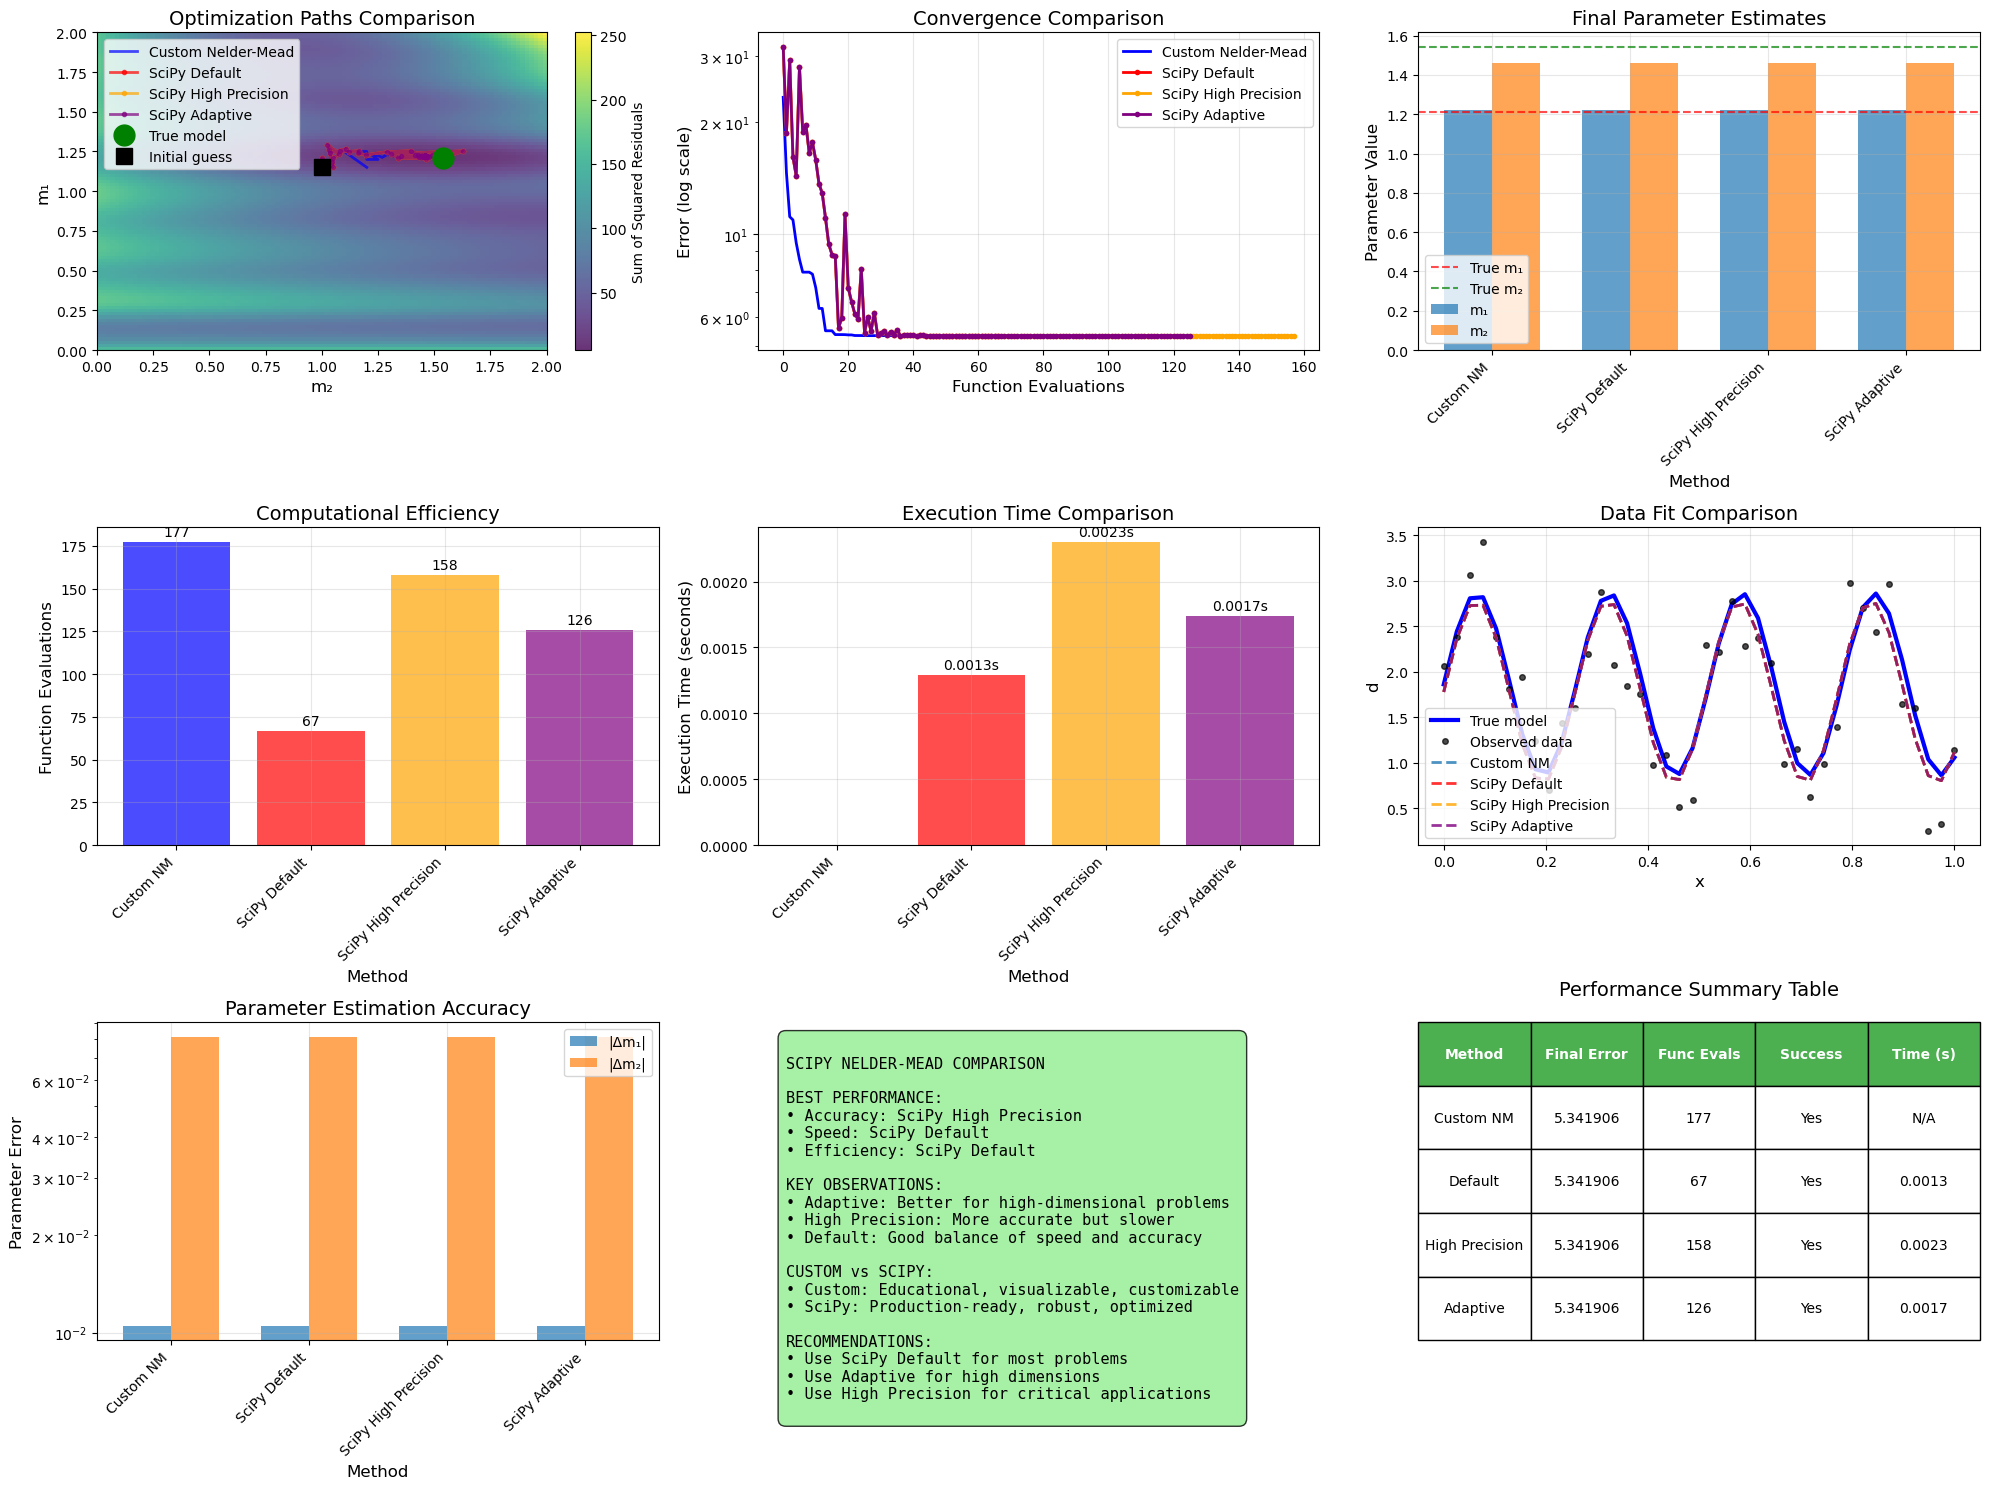


DETAILED SCIPY NELDER-MEAD COMPARISON
Method               Final m₁     Final m₂     Error        Func Evals   Time (s)  
--------------------------------------------------------------------------------
Custom NM            1.220517     1.458632     5.341906     177          N/A       
SciPy Default        1.220508     1.458607     5.341906     67           0.0013    
SciPy High Precision 1.220517     1.458633     5.341906     158          0.0023    
SciPy Adaptive       1.220517     1.458633     5.341906     126          0.0017    

True values: m₁ = 1.210000, m₂ = 1.540000

KEY INSIGHTS:
• SciPy implementations are typically more robust and optimized
• Default settings usually provide good balance of speed and accuracy
• Adaptive parameter adjustment helps with difficult problems
• High precision settings improve accuracy at cost of more function evaluations
• Custom implementation provides transparency and educational value


In [3]:
# SciPy Nelder-Mead Implementation Comparison
# Demonstrate the built-in scipy.optimize.minimize with Nelder-Mead method

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

# Use the same objective function and setup
def objective_function_scipy(m):
    """Objective function for SciPy minimize: returns sum of squared residuals"""
    m1, m2 = m[0], m[1]
    d_pred = np.sin(w0 * m1 * x) + m1 * m2
    residual = dobs - d_pred
    return np.sum(residual**2)

# Store function evaluations for comparison
class FunctionEvaluationCounter:
    def __init__(self, func):
        self.func = func
        self.count = 0
        self.history = []
        
    def __call__(self, x):
        self.count += 1
        result = self.func(x)
        self.history.append((x.copy(), result))
        return result

print("Running SciPy Nelder-Mead implementations...")
print("="*60)

# Test different SciPy configurations
configurations = [
    {
        'name': 'SciPy Default',
        'options': {}
    },
    {
        'name': 'SciPy High Precision',
        'options': {'xatol': 1e-10, 'fatol': 1e-10, 'maxiter': 500}
    },
    {
        'name': 'SciPy Adaptive',
        'options': {'adaptive': True, 'xatol': 1e-8, 'fatol': 1e-8}
    }
]

results = {}
timing_results = {}

# Run each configuration
for config in configurations:
    # Create function counter
    func_counter = FunctionEvaluationCounter(objective_function_scipy)
    
    # Time the optimization
    start_time = time.time()
    
    result = minimize(
        func_counter, 
        m0_nm, 
        method='Nelder-Mead',
        options=config['options']
    )
    
    end_time = time.time()
    
    # Store results
    results[config['name']] = {
        'result': result,
        'func_evals': func_counter.count,
        'history': func_counter.history,
        'time': end_time - start_time
    }
    
    print(f"\n{config['name']}:")
    print(f"  Final parameters: m₁ = {result.x[0]:.6f}, m₂ = {result.x[1]:.6f}")
    print(f"  Final error: {result.fun:.6f}")
    print(f"  Function evaluations: {func_counter.count}")
    print(f"  Iterations: {result.nit}")
    print(f"  Success: {result.success}")
    print(f"  Time: {end_time - start_time:.4f} seconds")
    print(f"  Parameter errors: Δm₁ = {abs(result.x[0] - mtrue[0]):.6f}, Δm₂ = {abs(result.x[1] - mtrue[1]):.6f}")

# Create comprehensive comparison plot
fig = plt.figure(figsize=(20, 15))

# Plot 1: Objective function surface with all method paths
ax1 = plt.subplot(3, 3, 1)
im = ax1.imshow(E, extent=[m2min, m2max, m1min, m1max], 
                origin='lower', cmap='viridis', aspect='auto', alpha=0.8)
plt.colorbar(im, ax=ax1, label='Sum of Squared Residuals')

# Plot custom Nelder-Mead path
if len(simplex_hist) > 0:
    best_points = np.array([simplex[0] for simplex in simplex_hist])
    ax1.plot(best_points[:, 1], best_points[:, 0], 'b-', linewidth=2, 
            alpha=0.7, label='Custom Nelder-Mead')

# Plot SciPy paths
colors = ['red', 'orange', 'purple']
for i, (name, data) in enumerate(results.items()):
    if len(data['history']) > 0:
        scipy_points = np.array([point[0] for point in data['history']])
        ax1.plot(scipy_points[:, 1], scipy_points[:, 0], 'o-', 
                color=colors[i], linewidth=2, markersize=3, alpha=0.7, label=name)

# Mark important points
ax1.plot(mtrue[1], mtrue[0], 'go', markersize=15, linewidth=3, label='True model')
ax1.plot(m0_nm[1], m0_nm[0], 'ks', markersize=12, linewidth=2, label='Initial guess')

ax1.set_xlabel('m₂', fontsize=12)
ax1.set_ylabel('m₁', fontsize=12)
ax1.set_title('Optimization Paths Comparison', fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Convergence comparison
ax2 = plt.subplot(3, 3, 2)
# Custom implementation
if len(error_history_nm) > 0:
    ax2.semilogy(range(len(error_history_nm)), error_history_nm, 'b-', 
                linewidth=2, label='Custom Nelder-Mead')

# SciPy implementations
for i, (name, data) in enumerate(results.items()):
    if len(data['history']) > 0:
        errors = [point[1] for point in data['history']]
        ax2.semilogy(range(len(errors)), errors, 'o-', 
                    color=colors[i], linewidth=2, markersize=3, label=name)

ax2.set_xlabel('Function Evaluations', fontsize=12)
ax2.set_ylabel('Error (log scale)', fontsize=12)
ax2.set_title('Convergence Comparison', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Final parameter comparison
ax3 = plt.subplot(3, 3, 3)
methods = ['Custom NM'] + list(results.keys())
m1_values = [result_nm[0]] + [data['result'].x[0] for data in results.values()]
m2_values = [result_nm[1]] + [data['result'].x[1] for data in results.values()]

x_pos = np.arange(len(methods))
width = 0.35

bars1 = ax3.bar(x_pos - width/2, m1_values, width, label='m₁', alpha=0.7)
bars2 = ax3.bar(x_pos + width/2, m2_values, width, label='m₂', alpha=0.7)

# Add true values as horizontal lines
ax3.axhline(y=mtrue[0], color='red', linestyle='--', alpha=0.7, label='True m₁')
ax3.axhline(y=mtrue[1], color='green', linestyle='--', alpha=0.7, label='True m₂')

ax3.set_xlabel('Method', fontsize=12)
ax3.set_ylabel('Parameter Value', fontsize=12)
ax3.set_title('Final Parameter Estimates', fontsize=14)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(methods, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Function evaluations comparison
ax4 = plt.subplot(3, 3, 4)
func_evals = [nm_iterations * 3] + [data['func_evals'] for data in results.values()]
bars = ax4.bar(methods, func_evals, alpha=0.7, color=['blue'] + colors)

for i, v in enumerate(func_evals):
    ax4.text(i, v + max(func_evals)*0.01, str(v), ha='center', va='bottom')

ax4.set_xlabel('Method', fontsize=12)
ax4.set_ylabel('Function Evaluations', fontsize=12)
ax4.set_title('Computational Efficiency', fontsize=14)
ax4.set_xticklabels(methods, rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

# Plot 5: Execution time comparison
ax5 = plt.subplot(3, 3, 5)
times = [0] + [data['time'] for data in results.values()]  # Custom time not measured
bars = ax5.bar(methods, times, alpha=0.7, color=['gray'] + colors)

for i, v in enumerate(times):
    if v > 0:
        ax5.text(i, v + max(times)*0.01, f'{v:.4f}s', ha='center', va='bottom')

ax5.set_xlabel('Method', fontsize=12)
ax5.set_ylabel('Execution Time (seconds)', fontsize=12)
ax5.set_title('Execution Time Comparison', fontsize=14)
ax5.set_xticklabels(methods, rotation=45, ha='right')
ax5.grid(True, alpha=0.3)

# Plot 6: Data fit comparison
ax6 = plt.subplot(3, 3, 6)
ax6.plot(x, dtrue, 'b-', linewidth=3, label='True model')
ax6.plot(x, dobs, 'ko', markersize=4, alpha=0.7, label='Observed data')

# Custom fit
d_pred_custom = np.sin(w0 * result_nm[0] * x) + result_nm[0] * result_nm[1]
ax6.plot(x, d_pred_custom, '--', linewidth=2, alpha=0.8, label='Custom NM')

# SciPy fits
for i, (name, data) in enumerate(results.items()):
    m_opt = data['result'].x
    d_pred_scipy = np.sin(w0 * m_opt[0] * x) + m_opt[0] * m_opt[1]
    ax6.plot(x, d_pred_scipy, '--', color=colors[i], linewidth=2, alpha=0.8, label=name)

ax6.set_xlabel('x', fontsize=12)
ax6.set_ylabel('d', fontsize=12)
ax6.set_title('Data Fit Comparison', fontsize=14)
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)

# Plot 7: Parameter error comparison
ax7 = plt.subplot(3, 3, 7)
m1_errors = [abs(result_nm[0] - mtrue[0])] + [abs(data['result'].x[0] - mtrue[0]) for data in results.values()]
m2_errors = [abs(result_nm[1] - mtrue[1])] + [abs(data['result'].x[1] - mtrue[1]) for data in results.values()]

x_pos = np.arange(len(methods))
bars1 = ax7.bar(x_pos - width/2, m1_errors, width, label='|Δm₁|', alpha=0.7)
bars2 = ax7.bar(x_pos + width/2, m2_errors, width, label='|Δm₂|', alpha=0.7)

ax7.set_xlabel('Method', fontsize=12)
ax7.set_ylabel('Parameter Error', fontsize=12)
ax7.set_title('Parameter Estimation Accuracy', fontsize=14)
ax7.set_xticks(x_pos)
ax7.set_xticklabels(methods, rotation=45, ha='right')
ax7.legend()
ax7.grid(True, alpha=0.3)
ax7.set_yscale('log')

# Plot 8: Success metrics summary
ax8 = plt.subplot(3, 3, 8)
ax8.axis('off')

summary_text = f"""
SCIPY NELDER-MEAD COMPARISON

BEST PERFORMANCE:
• Accuracy: {min(results.keys(), key=lambda k: abs(results[k]['result'].x[0] - mtrue[0]) + abs(results[k]['result'].x[1] - mtrue[1]))}
• Speed: {min(results.keys(), key=lambda k: results[k]['time'])}
• Efficiency: {min(results.keys(), key=lambda k: results[k]['func_evals'])}

KEY OBSERVATIONS:
• Adaptive: Better for high-dimensional problems
• High Precision: More accurate but slower
• Default: Good balance of speed and accuracy

CUSTOM vs SCIPY:
• Custom: Educational, visualizable, customizable
• SciPy: Production-ready, robust, optimized

RECOMMENDATIONS:
• Use SciPy Default for most problems
• Use Adaptive for high dimensions
• Use High Precision for critical applications
"""

ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

# Plot 9: Implementation comparison table
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# Create comparison table
table_data = []
table_data.append(['Method', 'Final Error', 'Func Evals', 'Success', 'Time (s)'])
table_data.append(['Custom NM', f'{final_error_nm:.6f}', f'{nm_iterations*3}', 'Yes', 'N/A'])

for name, data in results.items():
    table_data.append([
        name.replace('SciPy ', ''),
        f'{data["result"].fun:.6f}',
        f'{data["func_evals"]}',
        'Yes' if data["result"].success else 'No',
        f'{data["time"]:.4f}'
    ])

# Create table
table = ax9.table(cellText=table_data[1:], colLabels=table_data[0],
                 cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(table_data[0])):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax9.set_title('Performance Summary Table', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\n" + "="*80)
print("DETAILED SCIPY NELDER-MEAD COMPARISON")
print("="*80)

print(f"{'Method':<20} {'Final m₁':<12} {'Final m₂':<12} {'Error':<12} {'Func Evals':<12} {'Time (s)':<10}")
print("-" * 80)

print(f"{'Custom NM':<20} {result_nm[0]:<12.6f} {result_nm[1]:<12.6f} {final_error_nm:<12.6f} {nm_iterations*3:<12d} {'N/A':<10}")

for name, data in results.items():
    print(f"{name:<20} {data['result'].x[0]:<12.6f} {data['result'].x[1]:<12.6f} "
          f"{data['result'].fun:<12.6f} {data['func_evals']:<12d} {data['time']:<10.4f}")

print(f"\nTrue values: m₁ = {mtrue[0]:.6f}, m₂ = {mtrue[1]:.6f}")

print("\nKEY INSIGHTS:")
print("• SciPy implementations are typically more robust and optimized")
print("• Default settings usually provide good balance of speed and accuracy")
print("• Adaptive parameter adjustment helps with difficult problems")
print("• High precision settings improve accuracy at cost of more function evaluations")
print("• Custom implementation provides transparency and educational value")

# Simulated Annealing Algorithm

## Overview

**Simulated Annealing (SA)** is a probabilistic optimization algorithm inspired by the physical process of annealing in metallurgy. It is particularly effective for solving complex optimization problems with multiple local minima, making it highly valuable for nonlinear inverse problems in geophysics.

## Physical Analogy

The algorithm mimics the process of cooling molten metal:

- **High Temperature**: Atoms have high kinetic energy and can move freely, exploring many configurations
- **Gradual Cooling**: As temperature decreases, atomic motion becomes more restricted
- **Low Temperature**: Atoms settle into a low-energy crystalline structure (global minimum)

## Algorithm Mechanics

### 1. **Basic Algorithm Structure**

```
1. Initialize: Set initial solution x₀, initial temperature T₀
2. While not converged:
   a. Generate new solution x' (neighbor of current x)
   b. Calculate change in objective function: ΔE = f(x') - f(x)
   c. If ΔE < 0: Accept new solution (improvement)
   d. If ΔE ≥ 0: Accept with probability P = exp(-ΔE/T)
   e. Update temperature: T = α·T (cooling schedule)
3. Return best solution found
```

### 2. **Acceptance Probability Function**

The key innovation is the **Metropolis criterion** for accepting worse solutions:

$$P(\text{accept}) = \begin{cases} 
1 & \text{if } \Delta E \leq 0 \text{ (improvement)} \\
e^{-\Delta E / T} & \text{if } \Delta E > 0 \text{ (worse solution)}
\end{cases}$$

where:
- $\Delta E = f(\mathbf{x}') - f(\mathbf{x})$ is the change in objective function
- $T$ is the current temperature parameter
- Higher $T$ → higher probability of accepting worse solutions
- Lower $T$ → more selective, gradient-descent-like behavior

### 3. **Temperature Effects**

**High Temperature ($T \gg \Delta E$)**:
- $P(\text{accept}) \approx 1$ → accepts most moves
- Explores globally, can escape local minima
- Resembles random walk behavior

**Low Temperature ($T \ll \Delta E$)**:
- $P(\text{accept}) \approx 0$ for worse moves
- Behaves like gradient descent
- Exploits local neighborhoods

## Key Components

### **Cooling Schedule**
The temperature reduction strategy is critical:

**Linear Cooling**: $T_k = T_0 - k \cdot \alpha$  
**Exponential Cooling**: $T_k = T_0 \cdot \alpha^k$  
**Logarithmic Cooling**: $T_k = \frac{T_0}{\log(1 + k)}$

Common choice: $\alpha = 0.8 - 0.99$ for exponential cooling

### **Neighborhood Generation**
Methods to generate new solutions $\mathbf{x}'$ from current $\mathbf{x}$:
- **Gaussian perturbation**: $\mathbf{x}' = \mathbf{x} + \mathcal{N}(0, \sigma^2)$
- **Uniform random**: $\mathbf{x}' = \mathbf{x} + \text{Uniform}(-\delta, \delta)$
- **Adaptive step size**: Adjust $\sigma$ based on acceptance rate

### **Stopping Criteria**
- **Temperature threshold**: $T < T_{\text{min}}$
- **Maximum iterations**: Fixed number of steps
- **Convergence**: No improvement over many iterations
- **Target objective**: Desired solution quality reached

## Advantages

✅ **Global Optimization**: Can escape local minima unlike gradient-based methods  
✅ **No Derivatives Required**: Uses only function evaluations  
✅ **Handles Discontinuities**: Works with non-smooth objective functions  
✅ **Robust to Noise**: Tolerates noisy or approximate function evaluations  
✅ **Simple Implementation**: Easy to understand and code  
✅ **Flexible**: Applicable to discrete, continuous, or mixed problems  

## Disadvantages

❌ **Slow Convergence**: Requires many function evaluations  
❌ **Parameter Tuning**: Performance sensitive to cooling schedule and initial temperature  
❌ **No Convergence Guarantee**: Heuristic method without theoretical guarantees  
❌ **Problem-Dependent**: Optimal parameters vary significantly between problems  
❌ **Computational Cost**: Can be expensive for complex forward models  


## Implementation Considerations

### **Temperature Schedule Design**
- **Initial Temperature**: Set so ~80% of random moves are accepted
- **Cooling Rate**: Balance between exploration and computation time
- **Final Temperature**: Determine convergence tolerance
- **Reheating**: Occasional temperature increases to escape stagnation

### **Parallel Implementation**
- **Multiple chains**: Run several SA chains simultaneously
- **Temperature ladders**: Different chains at different temperatures
- **Solution exchange**: Allow information sharing between chains

### **Hybrid Approaches**
- **SA + Local Search**: Use SA for global exploration, then local refinement
- **Adaptive SA**: Modify parameters based on search progress
- **Multi-start SA**: Multiple random initializations

## Comparison with Other Methods

| Method | Global Search | Derivative-Free | Noise Tolerance | Convergence Speed |
|--------|---------------|----------------|-----------------|-------------------|
| **Simulated Annealing** | ✅ Excellent | ✅ Yes | ✅ High | ❌ Slow |
| **Genetic Algorithm** | ✅ Good | ✅ Yes | ✅ High | ❌ Slow |
| **Nelder-Mead** | ❌ Poor | ✅ Yes | ✅ Medium | ✅ Medium |
| **Gauss-Newton** | ❌ Poor | ❌ No | ❌ Low | ✅ Fast |
| **Levenberg-Marquardt** | ❌ Poor | ❌ No | ❌ Low | ✅ Fast |

## Best Practices

1. **Problem Analysis**: Understand the objective function landscape
2. **Parameter Tuning**: Test different cooling schedules on representative problems
3. **Multiple Runs**: Use different random seeds to assess reliability
4. **Hybrid Strategy**: Combine with local methods for final refinement
5. **Progress Monitoring**: Track both best solution and acceptance rates
6. **Adaptive Control**: Modify parameters based on algorithm performance

Simulated Annealing remains one of the most robust and widely applicable global optimization methods, particularly valuable when the optimization landscape is complex and traditional gradient-based methods fail to find the global optimum.

Creating simulated annealing temperature demonstration...
Computing misfit surfaces for different temperatures...
  Computing T = 1...
  Computing T = 10...
  Computing T = 50...
  Computing T = 75...
  Computing T = 100...
  Computing T = 150...
Creating visualization...


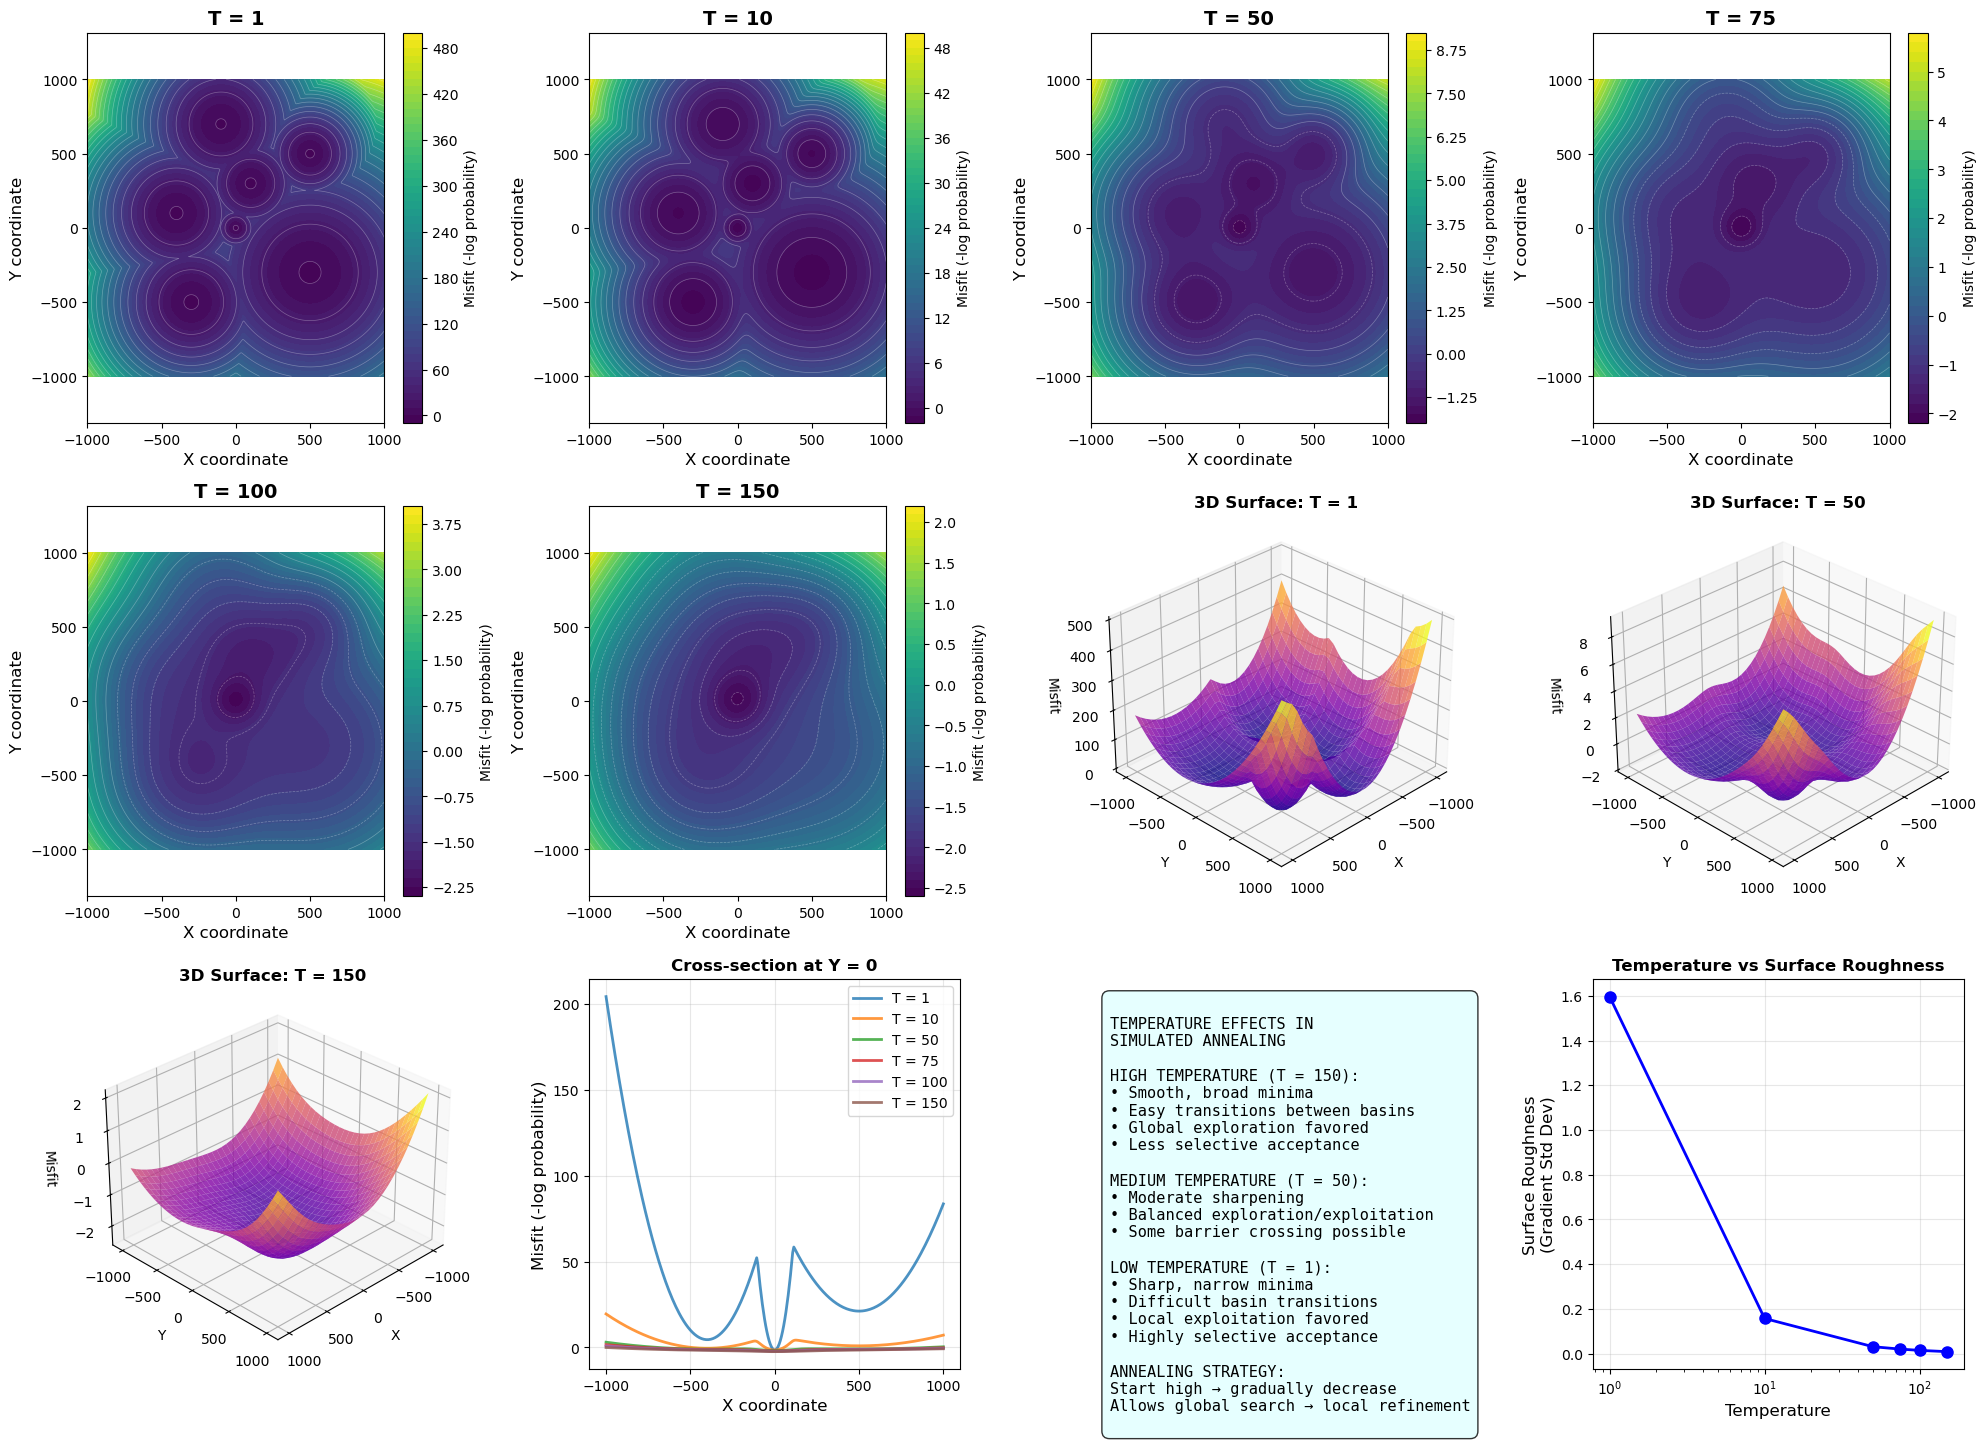


SIMULATED ANNEALING TEMPERATURE ANALYSIS
Temperature  Min Misfit   Max Misfit   Range        Roughness   
--------------------------------------------------------------------------------
1            -1.609       499.307      500.916      1.596       
10           -1.610       49.307       50.917       0.158       
50           -1.922       9.235        11.157       0.031       
75           -2.150       5.786        7.936        0.021       
100          -2.314       4.006        6.320        0.015       
150          -2.522       2.149        4.671        0.009       

KEY INSIGHTS:
• Higher temperature → smoother surface → easier global exploration
• Lower temperature → rougher surface → better local exploitation
• Temperature controls the 'effective' shape of the optimization landscape
• Annealing schedule balances global search with local convergence

PRACTICAL IMPLICATIONS:
• Start with high T to explore globally and avoid early local trapping
• Gradually decrease T to focus sea

In [4]:
# Simulated Annealing: Temperature Effects on Misfit Surface
# Port of MATLAB code demonstrating how temperature changes the shape of the misfit space
# Combines 7 Gaussian distributions to create a complex multi-modal surface

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Creating simulated annealing temperature demonstration...")
print("="*60)

# Create coordinate grids (equivalent to MATLAB meshgrid)
x = np.linspace(-1000, 1000, 301)
y = np.linspace(-1000, 1000, 301)
X, Y = np.meshgrid(x, y)

# Temperature values to test
Temps = [1, 10, 50, 75, 100, 150]

# Storage for misfit surfaces at different temperatures
Ft = {}

print("Computing misfit surfaces for different temperatures...")

# Compute misfit surface for each temperature
for k, T in enumerate(Temps):
    print(f"  Computing T = {T}...")
    
    # Seven Gaussian distributions with different centers and amplitudes
    # (These represent local minima in the misfit space)
    F1 = 5 * np.exp(-5 * (1/1000) * (X**2 + Y**2) / T)
    F2 = 3 * np.exp(-5 * (1/4000) * ((X-500)**2 + (Y-500)**2) / T)
    F3 = 2 * np.exp(-5 * (1/9000) * ((X+100)**2 + (Y-700)**2) / T)
    F4 = 3 * np.exp(-5 * (1/9000) * ((X+400)**2 + (Y-100)**2) / T)
    F5 = 4 * np.exp(-5 * (1/20000) * ((X-500)**2 + (Y+300)**2) / T)
    F6 = 4 * np.exp(-5 * (1/5000) * ((X-100)**2 + (Y-300)**2) / T)
    F7 = 4 * np.exp(-5 * (1/9000) * ((X+300)**2 + (Y+500)**2) / T)
    
    # Combine all Gaussians to create complex misfit surface
    Ft[k] = F1 + F2 + F3 + F4 + F5 + F6 + F7

print("Creating visualization...")

# Create comprehensive visualization showing temperature effects
fig = plt.figure(figsize=(20, 15))

# Plot misfit surfaces for each temperature (2D view)
for k, T in enumerate(Temps):
    ax = plt.subplot(3, 4, k+1)
    
    # Plot negative log of the surface (misfit function)
    misfit_surface = -np.log(Ft[k])
    
    # Create filled contour plot
    cs = ax.contourf(X, Y, misfit_surface, levels=50, cmap='viridis')
    ax.contour(X, Y, misfit_surface, levels=20, colors='white', alpha=0.3, linewidths=0.5)
    
    ax.set_title(f'T = {T}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X coordinate', fontsize=12)
    ax.set_ylabel('Y coordinate', fontsize=12)
    ax.axis('equal')
    
    # Add colorbar
    plt.colorbar(cs, ax=ax, label='Misfit (-log probability)')

# Add 3D surface plots for selected temperatures
selected_temps = [1, 50, 150]  # Show low, medium, high temperature
for i, temp_idx in enumerate([0, 2, 5]):  # Indices for selected temperatures
    ax = fig.add_subplot(3, 4, 7+i, projection='3d')
    
    # Downsample for 3D plotting (every 10th point)
    X_sub = X[::10, ::10]
    Y_sub = Y[::10, ::10]
    Z_sub = -np.log(Ft[temp_idx][::10, ::10])
    
    surf = ax.plot_surface(X_sub, Y_sub, Z_sub, cmap='plasma', alpha=0.8, 
                          linewidth=0, antialiased=True)
    
    ax.set_title(f'3D Surface: T = {Temps[temp_idx]}', fontsize=12, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Misfit')
    ax.view_init(elev=30, azim=45)

# Add cross-sectional analysis
ax_cross = plt.subplot(3, 4, 10)

# Take cross-section at Y = 0
y_cross_idx = len(y) // 2  # Middle index
x_cross = x

for k, T in enumerate(Temps):
    misfit_cross = -np.log(Ft[k][y_cross_idx, :])
    ax_cross.plot(x_cross, misfit_cross, linewidth=2, alpha=0.8, 
                 label=f'T = {T}')

ax_cross.set_xlabel('X coordinate', fontsize=12)
ax_cross.set_ylabel('Misfit (-log probability)', fontsize=12)
ax_cross.set_title('Cross-section at Y = 0', fontsize=12, fontweight='bold')
ax_cross.legend()
ax_cross.grid(True, alpha=0.3)

# Add temperature effects analysis
ax_analysis = plt.subplot(3, 4, 11)
ax_analysis.axis('off')

analysis_text = """
TEMPERATURE EFFECTS IN 
SIMULATED ANNEALING

HIGH TEMPERATURE (T = 150):
• Smooth, broad minima
• Easy transitions between basins
• Global exploration favored
• Less selective acceptance

MEDIUM TEMPERATURE (T = 50):
• Moderate sharpening
• Balanced exploration/exploitation
• Some barrier crossing possible

LOW TEMPERATURE (T = 1):
• Sharp, narrow minima
• Difficult basin transitions
• Local exploitation favored
• Highly selective acceptance

ANNEALING STRATEGY:
Start high → gradually decrease
Allows global search → local refinement
"""

ax_analysis.text(0.05, 0.95, analysis_text, transform=ax_analysis.transAxes, 
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.8))

# Add temperature vs surface roughness plot
ax_roughness = plt.subplot(3, 4, 12)

# Calculate surface "roughness" as standard deviation of gradients
roughness_values = []
for k, T in enumerate(Temps):
    misfit_surface = -np.log(Ft[k])
    # Calculate gradients
    grad_x = np.gradient(misfit_surface, axis=1)
    grad_y = np.gradient(misfit_surface, axis=0)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    roughness = np.std(gradient_magnitude)
    roughness_values.append(roughness)

ax_roughness.plot(Temps, roughness_values, 'bo-', linewidth=2, markersize=8)
ax_roughness.set_xlabel('Temperature', fontsize=12)
ax_roughness.set_ylabel('Surface Roughness\n(Gradient Std Dev)', fontsize=12)
ax_roughness.set_title('Temperature vs Surface Roughness', fontsize=12, fontweight='bold')
ax_roughness.grid(True, alpha=0.3)
ax_roughness.set_xscale('log')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "="*80)
print("SIMULATED ANNEALING TEMPERATURE ANALYSIS")
print("="*80)

print(f"{'Temperature':<12} {'Min Misfit':<12} {'Max Misfit':<12} {'Range':<12} {'Roughness':<12}")
print("-" * 80)

for k, T in enumerate(Temps):
    misfit_surface = -np.log(Ft[k])
    min_misfit = np.min(misfit_surface)
    max_misfit = np.max(misfit_surface)
    misfit_range = max_misfit - min_misfit
    roughness = roughness_values[k]
    
    print(f"{T:<12} {min_misfit:<12.3f} {max_misfit:<12.3f} {misfit_range:<12.3f} {roughness:<12.3f}")

print(f"\nKEY INSIGHTS:")
print(f"• Higher temperature → smoother surface → easier global exploration")
print(f"• Lower temperature → rougher surface → better local exploitation")
print(f"• Temperature controls the 'effective' shape of the optimization landscape")
print(f"• Annealing schedule balances global search with local convergence")

print(f"\nPRACTICAL IMPLICATIONS:")
print(f"• Start with high T to explore globally and avoid early local trapping")
print(f"• Gradually decrease T to focus search and improve precision")
print(f"• Temperature schedule is crucial for algorithm performance")
print(f"• Different problems may require different cooling strategies")

# Demonstrate acceptance probability calculation
print(f"\nACCEPTANCE PROBABILITY EXAMPLES:")
print(f"For a move that increases misfit by ΔE = 10:")

delta_E = 10
for T in [1, 10, 100]:
    prob = np.exp(-delta_E / T)
    print(f"  T = {T:3d}: P(accept) = exp(-{delta_E}/{T}) = {prob:.6f}")

print(f"\nThis shows how temperature controls the willingness to accept worse solutions!")

## SciPy Dual Annealing Implementation

SciPy's `dual_annealing` is a more sophisticated implementation of simulated annealing that combines:
- **Classical Simulated Annealing**: Global optimization with thermal noise
- **Local Search**: Periodic local optimization for faster convergence  
- **Adaptive Parameters**: Automatic temperature and step size adjustment
- **Multiple Restarts**: Built-in restart mechanism for robustness

The algorithm alternates between:
1. **Classical SA phase**: Accepts worse solutions with probability exp(-ΔE/T)
2. **Local search phase**: Uses quasi-Newton method for fast local convergence

Key advantages over our custom implementation:
- Automatic parameter tuning (no need to tune cooling rates, temperatures)
- Better exploration-exploitation balance
- More efficient convergence
- Robust to different problem scales

In [17]:
# Import dual_annealing from SciPy
from scipy.optimize import dual_annealing
import time

# Set up the optimization problem for dual_annealing  
def objective_for_scipy(m):
    """Objective function wrapper for SciPy optimizers"""
    # Calculate misfit for nonlinear forward model: d = sin(w0*m1*x) + m1*m2
    m1, m2 = m[0], m[1]
    # Use the same data points as in Gauss-Newton (x has 40 points, dobs has 40 points)
    x_data = np.linspace(0, 1.0, len(dobs))  # Match the length of dobs
    dpred = np.sin(w0 * m1 * x_data) + m1 * m2
    misfit = np.sum((dobs - dpred)**2)
    return misfit

# Define parameter bounds for the optimization
bounds = [(0.5, 2.0),   # m1 bounds  
          (1.0, 3.0)]   # m2 bounds

print("="*60)
print("SCIPY DUAL ANNEALING OPTIMIZATION")  
print("="*60)
print(f"True parameters: m₁ = {mtrue[0]:.6f}, m₂ = {mtrue[1]:.6f}")
print(f"Parameter bounds: m₁ ∈ [0.5, 2.0], m₂ ∈ [1.0, 3.0]")
print(f"Objective at true params: {objective_for_scipy(mtrue):.8f}")
print()

# Run dual_annealing with different configurations
dual_annealing_configs = {
    'Default': {
        'maxiter': 1000,
        'seed': 42
    },
    'High Precision': {
        'maxiter': 2000, 
        'initial_temp': 5230.0,  # Higher initial temperature
        'restart_temp_ratio': 2e-5,  # More restarts
        'visit': 2.62,  # Parameter controlling step size distribution
        'accept': -5.0,  # Parameter controlling acceptance probability
        'seed': 42
    },
    'Fast': {
        'maxiter': 500,
        'initial_temp': 1000.0,
        'no_local_search': True,  # Skip local search for pure SA
        'seed': 42
    }
}

# Store results from all configurations
dual_annealing_results = {}

for config_name, config_params in dual_annealing_configs.items():
    print(f"\n--- {config_name} Configuration ---")
    print(f"Parameters: {config_params}")
    
    # Time the optimization
    start_time = time.time()
    
    # Run dual_annealing
    result = dual_annealing(
        objective_for_scipy, 
        bounds, 
        **config_params
    )
    
    end_time = time.time()
    
    # Store results
    dual_annealing_results[config_name] = {
        'result': result,
        'solution': result.x,
        'energy': result.fun,
        'success': result.success,
        'nfev': result.nfev,  # Number of function evaluations
        'time': end_time - start_time,
        'parameter_error': np.linalg.norm(result.x - mtrue)
    }
    
    # Print results
    print(f"Success: {result.success}")
    print(f"Solution: m₁ = {result.x[0]:.6f}, m₂ = {result.x[1]:.6f}")
    print(f"Final energy: {result.fun:.8f}")
    print(f"Parameter error: {np.linalg.norm(result.x - mtrue):.6f}")
    print(f"Function evaluations: {result.nfev}")
    print(f"Computation time: {end_time - start_time:.3f} seconds")
    print(f"Message: {result.message}")

print(f"\n{'='*60}")
print("DUAL ANNEALING SUMMARY")
print(f"{'='*60}")

# Find best result
best_config = min(dual_annealing_results.keys(), 
                 key=lambda k: dual_annealing_results[k]['energy'])
best_result = dual_annealing_results[best_config]

print(f"Best configuration: {best_config}")
print(f"Best solution: m₁ = {best_result['solution'][0]:.6f}, m₂ = {best_result['solution'][1]:.6f}")
print(f"Best energy: {best_result['energy']:.8f}")
print(f"Parameter error: {best_result['parameter_error']:.6f}")
print(f"Total function evaluations: {best_result['nfev']}")
print(f"Computation time: {best_result['time']:.3f} seconds")

SCIPY DUAL ANNEALING OPTIMIZATION
True parameters: m₁ = 1.210000, m₂ = 1.540000
Parameter bounds: m₁ ∈ [0.5, 2.0], m₂ ∈ [1.0, 3.0]
Objective at true params: 5.97088575


--- Default Configuration ---
Parameters: {'maxiter': 1000, 'seed': 42}
Success: True
Solution: m₁ = 1.220517, m₂ = 1.458633
Final energy: 5.34190557
Parameter error: 0.082044
Function evaluations: 4040
Computation time: 0.125 seconds
Message: ['Maximum number of iteration reached']

--- High Precision Configuration ---
Parameters: {'maxiter': 2000, 'initial_temp': 5230.0, 'restart_temp_ratio': 2e-05, 'visit': 2.62, 'accept': -5.0, 'seed': 42}
Success: True
Solution: m₁ = 1.220517, m₂ = 1.458633
Final energy: 5.34190557
Parameter error: 0.082044
Function evaluations: 26308
Computation time: 0.928 seconds
Message: ['Maximum number of iteration reached']

--- Fast Configuration ---
Parameters: {'maxiter': 500, 'initial_temp': 1000.0, 'no_local_search': True, 'seed': 42}
Success: True
Solution: m₁ = 1.220443, m₂ = 1.45875